# Table of Contents
1. [Problem Statement and Initial Dataset](#ch1)
1. [Initial Dataset](#ch2)
1. [Data Preprocessing](#ch3)
1. [Exploratory Data Analysis](#ch4)

<a id="ch1"></a>
# 1: Problem Statement

For Problem Statement:

<a id="ch2"></a>
# 2: Initial Dataset

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('Data.csv')

In [2]:
df.head()

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,India,IND,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,22.15,23.85,25.01,25.93,27.41,28.34,29.74,30.95,32.06,32.82,34.4,35.42,36.64,37.81,38.8,39.88,41.04,..,..,..,..
1,India,IND,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,50.9,49.8113098144531,51.4087753295898,53.0035209655762,54.5948638916016,56.1821327209473,60.1,59.3410453796387,55.8,62.3,64.0231323242188,64.4,67.0934371948242,67.9,70.1307601928711,71.6510848999023,75,76.3,67.6,79.9,80.7380447387695,83.5852127075195,88,89.5348815917969,92.4568328857422,95.1932983398438,97.8152847290039,..
2,India,IND,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,39.5803384393815,37.1160057221975,38.9281807323758,40.7467406400792,42.5728005846051,44.4068679660777,48.2933973590191,48.0951723898254,43.4835770219083,51.4689537217364,53.488349427397,53.6212277246046,57.015292352079,57.3203007366693,60.5042187473303,62.2567915260688,65.7022359061516,68.3738236535823,56.086077638855,72.4040107597965,73.3363680663111,77.1202220299779,83.3679321086777,85.1752673357353,89.1008289701358,92.8253521089913,96.6659820678055,..
3,India,IND,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,82.8,85.2061004638672,85.8353652954102,86.4520034790039,87.0528335571289,87.6347122192383,91.3,88.7424163818359,87.6,89.8170852661133,90.3593521118164,90.9141464233398,91.488166809082,93.1,92.6935501098633,93.3164138793945,96.1,94,92.9,96.1,96.4644393920898,97.0837554931641,97.5,98.3137588500977,99.0889358520508,99.7837600708008,100,..
4,India,IND,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,35.2318382263184,..,..,53.1415519714355,..,..,79.8753280639648,..,..,..


In [3]:
df.describe()

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
count,1445,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443
unique,3,1,1443,1443,268,314,325,327,329,333,330,337,335,340,416,503,471,477,499,569,569,584,566,557,583,611,596,600,593,588,602,640,613,608,702,721,730,745,760,744,747,772,717,800,974,892,885,891,894,928,925,905,898,922,980,957,981,949,961,927,948,935,914,793,366
top,India,IND,"Employers, male (% of male employment) (modele...",HD.HCI.OVRL.UB.MA,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
freq,1443,1443,1,1,1166,1124,1113,1111,1108,1104,1108,1101,1103,1095,1015,925,961,955,934,853,857,840,857,866,841,815,829,826,833,838,823,783,815,817,714,703,694,686,665,686,676,655,708,626,437,529,537,531,524,477,470,496,512,486,411,426,422,446,454,480,458,467,481,616,1069


In [4]:
df.shape

(1448, 65)

In [5]:
df.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '1960 [YR1960]', '1961 [YR1961]', '1962 [YR1962]', '1963 [YR1963]',
       '1964 [YR1964]', '1965 [YR1965]', '1966 [YR1966]', '1967 [YR1967]',
       '1968 [YR1968]', '1969 [YR1969]', '1970 [YR1970]', '1971 [YR1971]',
       '1972 [YR1972]', '1973 [YR1973]', '1974 [YR1974]', '1975 [YR1975]',
       '1976 [YR1976]', '1977 [YR1977]', '1978 [YR1978]', '1979 [YR1979]',
       '1980 [YR1980]', '1981 [YR1981]', '1982 [YR1982]', '1983 [YR1983]',
       '1984 [YR1984]', '1985 [YR1985]', '1986 [YR1986]', '1987 [YR1987]',
       '1988 [YR1988]', '1989 [YR1989]', '1990 [YR1990]', '1991 [YR1991]',
       '1992 [YR1992]', '1993 [YR1993]', '1994 [YR1994]', '1995 [YR1995]',
       '1996 [YR1996]', '1997 [YR1997]', '1998 [YR1998]', '1999 [YR1999]',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [

In [6]:
df[df.isnull()==True].count().sum()

0

<a id="ch3"></a>
# 3: Data Preprocessing

In [7]:
new_df=df[df['Country Code']=='IND']
new_df=new_df.replace("..",np.nan)
new_df

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,India,IND,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.15,23.85,25.01,25.93,27.41,28.34,29.74,30.95,32.06,32.82,34.4,35.42,36.64,37.81,38.8,39.88,41.04,NaN,NaN,NaN,NaN
1,India,IND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.9,49.8113098144531,51.4087753295898,53.0035209655762,54.5948638916016,56.1821327209473,60.1,59.3410453796387,55.8,62.3,64.0231323242188,64.4,67.0934371948242,67.9,70.1307601928711,71.6510848999023,75,76.3,67.6,79.9,80.7380447387695,83.5852127075195,88,89.5348815917969,92.4568328857422,95.1932983398438,97.8152847290039,NaN
2,India,IND,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.5803384393815,37.1160057221975,38.9281807323758,40.7467406400792,42.5728005846051,44.4068679660777,48.2933973590191,48.0951723898254,43.4835770219083,51.4689537217364,53.488349427397,53.6212277246046,57.015292352079,57.3203007366693,60.5042187473303,62.2567915260688,65.7022359061516,68.3738236535823,56.086077638855,72.4040107597965,73.3363680663111,77.1202220299779,83.3679321086777,85.1752673357353,89.1008289701358,92.8253521089913,96.6659820678055,NaN
3,India,IND,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.8,85.2061004638672,85.8353652954102,86.4520034790039,87.0528335571289,87.6347122192383,91.3,88.7424163818359,87.6,89.8170852661133,90.3593521118164,90.9141464233398,91.488166809082,93.1,92.6935501098633,93.3164138793945,96.1,94,92.9,96.1,96.4644393920898,97.0837554931641,97.5,98.3137588500977,99.0889358520508,99.7837600708008,100,NaN
4,India,IND,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.2318382263184,NaN,NaN,53.1415519714355,NaN,NaN,79.8753280639648,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,India,IND,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.3,NaN,NaN,NaN,NaN
1439,India,IND,Women who were first mar

In [8]:
c = df.columns
factors = df[df.columns[2]]
years = c[4:65]
years

Index(['1960 [YR1960]', '1961 [YR1961]', '1962 [YR1962]', '1963 [YR1963]',
       '1964 [YR1964]', '1965 [YR1965]', '1966 [YR1966]', '1967 [YR1967]',
       '1968 [YR1968]', '1969 [YR1969]', '1970 [YR1970]', '1971 [YR1971]',
       '1972 [YR1972]', '1973 [YR1973]', '1974 [YR1974]', '1975 [YR1975]',
       '1976 [YR1976]', '1977 [YR1977]', '1978 [YR1978]', '1979 [YR1979]',
       '1980 [YR1980]', '1981 [YR1981]', '1982 [YR1982]', '1983 [YR1983]',
       '1984 [YR1984]', '1985 [YR1985]', '1986 [YR1986]', '1987 [YR1987]',
       '1988 [YR1988]', '1989 [YR1989]', '1990 [YR1990]', '1991 [YR1991]',
       '1992 [YR1992]', '1993 [YR1993]', '1994 [YR1994]', '1995 [YR1995]',
       '1996 [YR1996]', '1997 [YR1997]', '1998 [YR1998]', '1999 [YR1999]',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]',
       '2012 [YR2012]', '

In [9]:
num_of_year_cols = len(years)
totalNones=new_df.iloc[:,4:].isnull().sum(axis=1)
new_df["Total_Null_Values"]=totalNones
no_null_df = new_df[new_df["Total_Null_Values"]<=0*num_of_year_cols] # contains no null values
null_df = new_df[new_df["Total_Null_Values"]<=(2/3)*num_of_year_cols] # contains atleast 33% data

In [10]:
no_null_df

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],Total_Null_Values
54,India,IND,Age dependency ratio (% of working-age populat...,SP.POP.DPND,76.9990446166511,78.0071064405409,79.1875305726612,80.3047250510323,80.9989516979179,81.1221770746329,81.5181791772064,81.3060850843081,80.6845573173082,79.9527457826968,79.2694671127816,79.0293327848886,78.7224437148975,78.3406308388556,77.8268564762813,77.1665825449187,76.9998407465221,76.6138996958549,76.0904353769291,75.53361999171,75.0009158122922,74.8830987451288,74.7448052671687,74.5543398002161,74.2447335710508,73.7878526232326,73.7513493876909,73.4469631349609,72.9542654229901,72.3691796708143,71.7330713075884,71.3090315218518,70.8021575859561,70.1952379725083,69.4566978241426,68.5869358924763,67.8836178107714,67.0641950369016,66.1515951110631,65.1808233261719,64.180372675695,63.4281013029749,62.6032527994971,61.7315764808457,60.8392022546978,59.9417432429456,59.2142970399348,58.4720498786624,57.7057029109493,56.8825138062336,55.9862600938871,55.2086374217727,54.3078443292764,53.3542663643901,52.4483667977637,51.6434416967877,50.8881370260245,50.2896371909076,49.7751668865187,49.2452418099917,48.6646203053887,0
55,India,IND,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,5.39346077102455,5.51858466722465,5.64495556786929,5.75293559878801,5.81803156964743,5.83090823246553,5.91111169096457,5.94328526882062,5.94384336183183,5.93374666467298,5.92402287973787,6.00258248040657,6.0709331997006,6.12377484621793,6.15433109979898,6.16143069774262,6.23164049875069,6.27672168064287,6.30203256167625,6.31379481004513,6.31641102252571,6.37468154944737,6.41484504815245,6.438133772238,6.44605075476131,6.44138032194077,6.49280474756374,6.52363153498534,6.53770678412237,6.5396529076866,6.53345611350675,6.61319584498546,6.67830868579671,6.72996109544671,6.76969955661533,6.80015440235648,6.89732938369049,6.97883656908439,7.04820302592204,7.10985269894402,7.1673543750024,7.27345503561995,7.36967780595362,7.45407598016851,7.5233163944524,7.57791698262994,7.66819485183319,7.74471513237023,7.81117340667339,7.87041961653101,7.92648814341566,8.0307326295612,8.12537045112334,8.22589671530142,8.35202955457644,8.5142267070789,8.74141020658705,8.9919993377127,9.25603886697997,9.5187483146847,9.77304664014027,0
56,India,IND,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,71.6055838456265,72.4885217733162,73.5425750047919,74.5517894522443,75.1809201282704,75.2912688421674,75.6070674862418,75.3627998154875,74.7407139554764,74.0189991180239,73.3454442330437,73.0267503044821,72.6515105151969,72.2168559926377,71.6725253764824,71.0051518471761,70.7682002477714,70.337178015212,69.7884028152529,69.2198251816648,68.6845047897665,68.5084171956814,68.3299602190162,68.1162060279781,67.7986828162895,67.3464723012918,67.2585446401272,66.9233315999755,66.4165586388677,65.8295267631277,65.1996151940817,64.6958356768664,64.1238489001593,63.4652768770616,62.6869982675273,61.7867814901199,60.986288427081,60.0853584678172,59.103392085141,58.0709706272279,57.0130183006926,56.1546462673549,55.2335749935435,54.2775005006772,53.3158858602454,52.363826260315

In [11]:
features = no_null_df[no_null_df.columns[2]].unique()

In [12]:
red_features = []
population = []
for i in features:
    if 'LCU' not in i and 'constant' not in i:
        red_features.append(i)
    if 'population' in i.lower():
        population.append(i)

In [13]:
red_features

['Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'Agriculture, forestry, and fishing, value added (% of GDP)',
 'Agriculture, forestry, and fishing, value added (current US$)',
 'Arms imports (SIPRI trend indicator values)',
 'Broad money (% of GDP)',
 'Broad money to total reserves ratio',
 'Changes in inventories (current US$)',
 'Claims on central government, etc. (% GDP)',
 'Consumer price index (2010 = 100)',
 'Domestic credit to private sector (% of GDP)',
 'Domestic credit to private sector by banks (% of GDP)',
 'Exports of goods and services (% of GDP)',
 'Exports of goods and services (current US$)',
 'External balance on goods and services (% of GDP)',
 'External balance on goods and services (current US$)',
 'Final consumption expenditure (% of GDP)',
 'Final consumption expenditure (current US$)',
 'Fixed telephone subscriptions',
 'Fixed telepho

In [14]:
len(red_features)

124

In [15]:
len(population)

68

In [16]:
selected_pop = ['Age dependency ratio (% of working-age population)',
                'Population ages 0-14, total',
                'Population ages 15-64 (% of total population)',
                'Population, female',
                 'Population, female (% of total population)',
                'Population, male',
                 'Population, male (% of total population)',
                 'Population, total',
                'Rural population',
                 'Rural population (% of total population)',
                 'Urban population',
                 'Urban population (% of total population)'
               ]

In [17]:
final_features = []
for i in red_features:
    if i not in population:
        final_features.append(i)
final_features = final_features + selected_pop

In [18]:
len(final_features)

68

In [19]:
final_features

['Agriculture, forestry, and fishing, value added (% of GDP)',
 'Agriculture, forestry, and fishing, value added (current US$)',
 'Arms imports (SIPRI trend indicator values)',
 'Broad money (% of GDP)',
 'Broad money to total reserves ratio',
 'Changes in inventories (current US$)',
 'Claims on central government, etc. (% GDP)',
 'Consumer price index (2010 = 100)',
 'Domestic credit to private sector (% of GDP)',
 'Domestic credit to private sector by banks (% of GDP)',
 'Exports of goods and services (% of GDP)',
 'Exports of goods and services (current US$)',
 'External balance on goods and services (% of GDP)',
 'External balance on goods and services (current US$)',
 'Final consumption expenditure (% of GDP)',
 'Final consumption expenditure (current US$)',
 'Fixed telephone subscriptions',
 'Fixed telephone subscriptions (per 100 people)',
 'GDP (current US$)',
 'GDP deflator (base year varies by country)',
 'GDP per capita (current US$)',
 'General government final consumption 

In [20]:
series = no_null_df[no_null_df.columns[2] ] 

In [21]:
new_no_null_df = no_null_df[no_null_df["Series Name"].isin(final_features)]

In [22]:
new_no_null_df=new_no_null_df.iloc[:,:-1]

In [23]:
new_no_null_df

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
54,India,IND,Age dependency ratio (% of working-age populat...,SP.POP.DPND,76.9990446166511,78.0071064405409,79.1875305726612,80.3047250510323,80.9989516979179,81.1221770746329,81.5181791772064,81.3060850843081,80.6845573173082,79.9527457826968,79.2694671127816,79.0293327848886,78.7224437148975,78.3406308388556,77.8268564762813,77.1665825449187,76.9998407465221,76.6138996958549,76.0904353769291,75.53361999171,75.0009158122922,74.8830987451288,74.7448052671687,74.5543398002161,74.2447335710508,73.7878526232326,73.7513493876909,73.4469631349609,72.9542654229901,72.3691796708143,71.7330713075884,71.3090315218518,70.8021575859561,70.1952379725083,69.4566978241426,68.5869358924763,67.8836178107714,67.0641950369016,66.1515951110631,65.1808233261719,64.180372675695,63.4281013029749,62.6032527994971,61.7315764808457,60.8392022546978,59.9417432429456,59.2142970399348,58.4720498786624,57.7057029109493,56.8825138062336,55.9862600938871,55.2086374217727,54.3078443292764,53.3542663643901,52.4483667977637,51.6434416967877,50.8881370260245,50.2896371909076,49.7751668865187,49.2452418099917,48.6646203053887
68,India,IND,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,41.3128390639122,40.3874016121362,38.3713352032108,39.3197513062973,41.1877383326384,38.9521434757491,40.0254476136132,42.7676217441188,41.6335506393159,41.3583433053687,39.92780620156,38.0997785048326,38.0177222720281,41.1620452004123,38.1996932775489,35.2695013495212,33.4429712884776,34.9477259662017,33.160038281816,31.280959448738,33.0574847297758,31.715142387441,30.5704700827392,31.32414521668,30.1467925285446,28.6352843497391,27.4687606025091,26.8840702791725,27.9822289098659,26.917943145353,26.8964382499641,27.3332181443779,26.669771971317,26.881800844094,26.3886188842791,24.4568552670561,25.4170307460273,24.3453570949732,24.3788210472195,22.9889609802859,21.6089574707079,21.6205046124833,19.5366997010537,19.5806067890042,17.8146906484855,17.6202069547056,16.8094420943591,16.750119759587,16.7909423598037,16.744270156395,17.0265090139755,17.1919735574898,16.8453770659702,17.148423543466,16.7919345145807,16.17450810661,16.3638005613987,16.5583314047008,15.9701574808791,16.6774623971688,18.3189877325451
73,India,IND,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.CD,15298096331.0212,15844961402.3457,16177923530.6432,19039379881.7027,23262954030.3429,23197892400.7476,18357856479.1243,21441522443.2027,22101360152.0907,24173122434.1733,24923928060.2093,25660577256.7808,27168678557.165,35199833920.0471,38018588193.949,34730864275.353,34351671820.6672,42457056541.9936,45528830485.1917,47857257182.8996,61594472500.7475,61365822478.0086,61359563464.0861,68368791476.2066,63958902685.6631,66580437366.9865,68393366637.7789,75015584849.83,82992211449.7807,79688512801.3293,86331925636.2927,73828482315.4666,76864531185.5153,75079800665.0874,86363506441.5546,88113635729.2706,99862765103.885,101244489721.004,102720522680.697,105478046711.373,101215262787.974,104954796939.212,100601880717.513,118991207540.395,126332614150.78,144552934947.689,158052441543,203804643612.754

In [24]:
new= new_no_null_df

In [25]:
n = new[years]
n['Series Name'] = new['Series Name']
n

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],Series Name
54,76.9990446166511,78.0071064405409,79.1875305726612,80.3047250510323,80.9989516979179,81.1221770746329,81.5181791772064,81.3060850843081,80.6845573173082,79.9527457826968,79.2694671127816,79.0293327848886,78.7224437148975,78.3406308388556,77.8268564762813,77.1665825449187,76.9998407465221,76.6138996958549,76.0904353769291,75.53361999171,75.0009158122922,74.8830987451288,74.7448052671687,74.5543398002161,74.2447335710508,73.7878526232326,73.7513493876909,73.4469631349609,72.9542654229901,72.3691796708143,71.7330713075884,71.3090315218518,70.8021575859561,70.1952379725083,69.4566978241426,68.5869358924763,67.8836178107714,67.0641950369016,66.1515951110631,65.1808233261719,64.180372675695,63.4281013029749,62.6032527994971,61.7315764808457,60.8392022546978,59.9417432429456,59.2142970399348,58.4720498786624,57.7057029109493,56.8825138062336,55.9862600938871,55.2086374217727,54.3078443292764,53.3542663643901,52.4483667977637,51.6434416967877,50.8881370260245,50.2896371909076,49.7751668865187,49.2452418099917,48.6646203053887,Age dependency ratio (% of working-age populat...
68,41.3128390639122,40.3874016121362,38.3713352032108,39.3197513062973,41.1877383326384,38.9521434757491,40.0254476136132,42.7676217441188,41.6335506393159,41.3583433053687,39.92780620156,38.0997785048326,38.0177222720281,41.1620452004123,38.1996932775489,35.2695013495212,33.4429712884776,34.9477259662017,33.160038281816,31.280959448738,33.0574847297758,31.715142387441,30.5704700827392,31.32414521668,30.1467925285446,28.6352843497391,27.4687606025091,26.8840702791725,27.9822289098659,26.917943145353,26.8964382499641,27.3332181443779,26.669771971317,26.881800844094,26.3886188842791,24.4568552670561,25.4170307460273,24.3453570949732,24.3788210472195,22.9889609802859,21.6089574707079,21.6205046124833,19.5366997010537,19.5806067890042,17.8146906484855,17.6202069547056,16.8094420943591,16.750119759587,16.7909423598037,16.744270156395,17.0265090139755,17.1919735574898,16.8453770659702,17.148423543466,16.7919345145807,16.17450810661,16.3638005613987,16.5583314047008,15.9701574808791,16.6774623971688,18.3189877325451,"Agriculture, forestry, and fishing, value adde..."
73,15298096331.0212,15844961402.3457,16177923530.6432,19039379881.7027,23262954030.3429,23197892400.7476,18357856479.1243,21441522443.2027,22101360152.0907,24173122434.1733,24923928060.2093,25660577256.7808,27168678557.165,35199833920.0471,38018588193.949,34730864275.353,34351671820.6672,42457056541.9936,45528830485.1917,47857257182.8996,61594472500.7475,61365822478.0086,61359563464.0861,68368791476.2066,63958902685.6631,66580437366.9865,68393366637.7789,75015584849.83,82992211449.7807,79688512801.3293,86331925636.2927,73828482315.4666,76864531185.5153,75079800665.0874,86363506441.5546,88113635729.2706,99862765103.885,101244489721.004,102720522680.697,105478046711.373,101215262787.974,104954796939.212,100601880717.513,118991207540.395,126332614150.78,144552934947.689,158052441543,203804643612.754,201305866150.943,224689117965.083,285298796155.585,313418261522.406,307872488771.924,318398573401.943,342408945451.421,340244981474.714,375516164817.583,43903967

In [26]:
n1 = n.T

In [27]:
n1.columns = n1.iloc[-1]

In [28]:
n1

Series Name,Age dependency ratio (% of working-age population),"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (current US$)",Arms imports (SIPRI trend indicator values),Broad money (% of GDP),Broad money to total reserves ratio,Changes in inventories (current US$),"Claims on central government, etc. (% GDP)",Consumer price index (2010 = 100),Domestic credit to private sector (% of GDP),Domestic credit to private sector by banks (% of GDP),Exports of goods and services (% of GDP),Exports of goods and services (current US$),External balance on goods and services (% of GDP),External balance on goods and services (current US$),Final consumption expenditure (% of GDP),Final consumption expenditure (current US$),Fixed telephone subscriptions,Fixed telephone subscriptions (per 100 people),GDP (current US$),GDP deflator (base year varies by country),GDP per capita (current US$),General government final consumption expenditure (% of GDP),General government final consumption expenditure (current US$),GNI (current US$),Gross capital formation (% of GDP),Gross capital formation (current US$),Gross domestic savings (% of GDP),Gross domestic savings (current US$),Gross fixed capital formation (% of GDP),Gross fixed capital formation (current US$),Gross national expenditure (% of GDP),Gross national expenditure (current US$),Gross national expenditure deflator (base year varies by country),Gross value added at basic prices (GVA) (current US$),Households and NPISHs final consumption expenditure (% of GDP),Households and NPISHs Final consumption expenditure (current US$),Imports of goods and services (% of GDP),Imports of goods and services (current US$),"Industry (including construction), value added (% of GDP)","Industry (including construction), value added (current US$)","Inflation, consumer prices (annual %)","Manufacturing, value added (% of GDP)","Manufacturing, value added (current US$)",Merchandise exports (current US$),Merchandise imports (current US$),Merchandise trade (% of GDP),Military expenditure (% of GDP),Military expenditure (current USD),Monetary Sector credit to private sector (% GDP),Net primary income (Net income from abroad) (current US$),"Population ages 0-14, total",Population ages 15-64 (% of total population),"Population, female","Population, female (% of total population)","Population, male","Population, male (% of total population)","Population, total",Rural population,Rural population (% of total population),"Services, value added (% of GDP)",Taxes less subsidies on products (current US$),"Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),Trade (% of GDP),Urban population,Urban population (% of total population),Wholesale price index (2010 = 100)
1960 [YR1960],76.9990446166511,41.3128390639122,15298096331.0212,544000000,22.0719249368892,12.1167743877611,457155875.215876,15.0000620395868,2.52748668877309,7.84313262788227,7.84313262788227,4.4631564556351,1652701652.70165,-2.37052020134113,-877800877.800878,93.9574148135212,34792321597.8286,332399,0.073776654,37029883875.4573,2.3924310174908,82.1886027387829,6.57349198912493,2434156450.13545,36878683724.2571,15.6904659533278,5810161322.03543,6.04258518647878,2237562277.62868,14.4559066531867,5353005446.81955,109.647880766849,40602482919.864,2.562205550268,34994675141.8283,87.383922824402,32358165147.6953,6.83367665697623,2530502530.50253,20.8343434548784,7714933187.55539,1.77987784677381,14.7501180854536,5461951598.5363,1332000000,2303000000,9.81639589318078,2.00401234567901,681765681.765682,7.84313262788227,-151200151.200151,182270641,56.4974800369574,218042936,48.3950862691723,232504739,51.6049137308277,450547675,369791510,82.076,38.7824617553695,2035208733.62907,674536630.92578,423000000,11.2968331126113,80756165,17.924,3.06838052854559
1961 [YR1961],78.0071064405409,40.3874016121362,15844961402.3457,1122000000,21.5018727925336,12.6594411626574,-380935670.561398,14.72

In [29]:
n1 = n1[:-1]

In [30]:
n1

Series Name,Age dependency ratio (% of working-age population),"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (current US$)",Arms imports (SIPRI trend indicator values),Broad money (% of GDP),Broad money to total reserves ratio,Changes in inventories (current US$),"Claims on central government, etc. (% GDP)",Consumer price index (2010 = 100),Domestic credit to private sector (% of GDP),Domestic credit to private sector by banks (% of GDP),Exports of goods and services (% of GDP),Exports of goods and services (current US$),External balance on goods and services (% of GDP),External balance on goods and services (current US$),Final consumption expenditure (% of GDP),Final consumption expenditure (current US$),Fixed telephone subscriptions,Fixed telephone subscriptions (per 100 people),GDP (current US$),GDP deflator (base year varies by country),GDP per capita (current US$),General government final consumption expenditure (% of GDP),General government final consumption expenditure (current US$),GNI (current US$),Gross capital formation (% of GDP),Gross capital formation (current US$),Gross domestic savings (% of GDP),Gross domestic savings (current US$),Gross fixed capital formation (% of GDP),Gross fixed capital formation (current US$),Gross national expenditure (% of GDP),Gross national expenditure (current US$),Gross national expenditure deflator (base year varies by country),Gross value added at basic prices (GVA) (current US$),Households and NPISHs final consumption expenditure (% of GDP),Households and NPISHs Final consumption expenditure (current US$),Imports of goods and services (% of GDP),Imports of goods and services (current US$),"Industry (including construction), value added (% of GDP)","Industry (including construction), value added (current US$)","Inflation, consumer prices (annual %)","Manufacturing, value added (% of GDP)","Manufacturing, value added (current US$)",Merchandise exports (current US$),Merchandise imports (current US$),Merchandise trade (% of GDP),Military expenditure (% of GDP),Military expenditure (current USD),Monetary Sector credit to private sector (% GDP),Net primary income (Net income from abroad) (current US$),"Population ages 0-14, total",Population ages 15-64 (% of total population),"Population, female","Population, female (% of total population)","Population, male","Population, male (% of total population)","Population, total",Rural population,Rural population (% of total population),"Services, value added (% of GDP)",Taxes less subsidies on products (current US$),"Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),Trade (% of GDP),Urban population,Urban population (% of total population),Wholesale price index (2010 = 100)
1960 [YR1960],76.9990446166511,41.3128390639122,15298096331.0212,544000000,22.0719249368892,12.1167743877611,457155875.215876,15.0000620395868,2.52748668877309,7.84313262788227,7.84313262788227,4.4631564556351,1652701652.70165,-2.37052020134113,-877800877.800878,93.9574148135212,34792321597.8286,332399,0.073776654,37029883875.4573,2.3924310174908,82.1886027387829,6.57349198912493,2434156450.13545,36878683724.2571,15.6904659533278,5810161322.03543,6.04258518647878,2237562277.62868,14.4559066531867,5353005446.81955,109.647880766849,40602482919.864,2.562205550268,34994675141.8283,87.383922824402,32358165147.6953,6.83367665697623,2530502530.50253,20.8343434548784,7714933187.55539,1.77987784677381,14.7501180854536,5461951598.5363,1332000000,2303000000,9.81639589318078,2.00401234567901,681765681.765682,7.84313262788227,-151200151.200151,182270641,56.4974800369574,218042936,48.3950862691723,232504739,51.6049137308277,450547675,369791510,82.076,38.7824617553695,2035208733.62907,674536630.92578,423000000,11.2968331126113,80756165,17.924,3.06838052854559
1961 [YR1961],78.0071064405409,40.3874016121362,15844961402.3457,1122000000,21.5018727925336,12.6594411626574,-380935670.561398,14.72

In [31]:
n1 = n1.drop(['Wholesale price index (2010 = 100)'],axis=1)

In [32]:
n1

Series Name,Age dependency ratio (% of working-age population),"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (current US$)",Arms imports (SIPRI trend indicator values),Broad money (% of GDP),Broad money to total reserves ratio,Changes in inventories (current US$),"Claims on central government, etc. (% GDP)",Consumer price index (2010 = 100),Domestic credit to private sector (% of GDP),Domestic credit to private sector by banks (% of GDP),Exports of goods and services (% of GDP),Exports of goods and services (current US$),External balance on goods and services (% of GDP),External balance on goods and services (current US$),Final consumption expenditure (% of GDP),Final consumption expenditure (current US$),Fixed telephone subscriptions,Fixed telephone subscriptions (per 100 people),GDP (current US$),GDP deflator (base year varies by country),GDP per capita (current US$),General government final consumption expenditure (% of GDP),General government final consumption expenditure (current US$),GNI (current US$),Gross capital formation (% of GDP),Gross capital formation (current US$),Gross domestic savings (% of GDP),Gross domestic savings (current US$),Gross fixed capital formation (% of GDP),Gross fixed capital formation (current US$),Gross national expenditure (% of GDP),Gross national expenditure (current US$),Gross national expenditure deflator (base year varies by country),Gross value added at basic prices (GVA) (current US$),Households and NPISHs final consumption expenditure (% of GDP),Households and NPISHs Final consumption expenditure (current US$),Imports of goods and services (% of GDP),Imports of goods and services (current US$),"Industry (including construction), value added (% of GDP)","Industry (including construction), value added (current US$)","Inflation, consumer prices (annual %)","Manufacturing, value added (% of GDP)","Manufacturing, value added (current US$)",Merchandise exports (current US$),Merchandise imports (current US$),Merchandise trade (% of GDP),Military expenditure (% of GDP),Military expenditure (current USD),Monetary Sector credit to private sector (% GDP),Net primary income (Net income from abroad) (current US$),"Population ages 0-14, total",Population ages 15-64 (% of total population),"Population, female","Population, female (% of total population)","Population, male","Population, male (% of total population)","Population, total",Rural population,Rural population (% of total population),"Services, value added (% of GDP)",Taxes less subsidies on products (current US$),"Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),Trade (% of GDP),Urban population,Urban population (% of total population)
1960 [YR1960],76.9990446166511,41.3128390639122,15298096331.0212,544000000,22.0719249368892,12.1167743877611,457155875.215876,15.0000620395868,2.52748668877309,7.84313262788227,7.84313262788227,4.4631564556351,1652701652.70165,-2.37052020134113,-877800877.800878,93.9574148135212,34792321597.8286,332399,0.073776654,37029883875.4573,2.3924310174908,82.1886027387829,6.57349198912493,2434156450.13545,36878683724.2571,15.6904659533278,5810161322.03543,6.04258518647878,2237562277.62868,14.4559066531867,5353005446.81955,109.647880766849,40602482919.864,2.562205550268,34994675141.8283,87.383922824402,32358165147.6953,6.83367665697623,2530502530.50253,20.8343434548784,7714933187.55539,1.77987784677381,14.7501180854536,5461951598.5363,1332000000,2303000000,9.81639589318078,2.00401234567901,681765681.765682,7.84313262788227,-151200151.200151,182270641,56.4974800369574,218042936,48.3950862691723,232504739,51.6049137308277,450547675,369791510,82.076,38.7824617553695,2035208733.62907,674536630.92578,423000000,11.2968331126113,80756165,17.924
1961 [YR1961],78.0071064405409,40.3874016121362,15844961402.3457,1122000000,21.5018727925336,12.6594411626574,-380935670.561398,14.725330359039,2.57033297015633,8.51617615457329,8.51617

In [33]:
n1.dtypes

Series Name
Age dependency ratio (% of working-age population)               object
Agriculture, forestry, and fishing, value added (% of GDP)       object
Agriculture, forestry, and fishing, value added (current US$)    object
Arms imports (SIPRI trend indicator values)                      object
Broad money (% of GDP)                                           object
                                                                  ...  
Total reserves (includes gold, current US$)                      object
Total reserves minus gold (current US$)                          object
Trade (% of GDP)                                                 object
Urban population                                                 object
Urban population (% of total population)                         object
Length: 67, dtype: object

In [34]:
n1 = n1.astype('float64')

In [35]:
n1.dtypes

Series Name
Age dependency ratio (% of working-age population)               float64
Agriculture, forestry, and fishing, value added (% of GDP)       float64
Agriculture, forestry, and fishing, value added (current US$)    float64
Arms imports (SIPRI trend indicator values)                      float64
Broad money (% of GDP)                                           float64
                                                                  ...   
Total reserves (includes gold, current US$)                      float64
Total reserves minus gold (current US$)                          float64
Trade (% of GDP)                                                 float64
Urban population                                                 float64
Urban population (% of total population)                         float64
Length: 67, dtype: object

In [36]:
n1.to_csv("final.csv")

In [37]:
n1

Series Name,Age dependency ratio (% of working-age population),"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (current US$)",Arms imports (SIPRI trend indicator values),Broad money (% of GDP),Broad money to total reserves ratio,Changes in inventories (current US$),"Claims on central government, etc. (% GDP)",Consumer price index (2010 = 100),Domestic credit to private sector (% of GDP),Domestic credit to private sector by banks (% of GDP),Exports of goods and services (% of GDP),Exports of goods and services (current US$),External balance on goods and services (% of GDP),External balance on goods and services (current US$),Final consumption expenditure (% of GDP),Final consumption expenditure (current US$),Fixed telephone subscriptions,Fixed telephone subscriptions (per 100 people),GDP (current US$),GDP deflator (base year varies by country),GDP per capita (current US$),General government final consumption expenditure (% of GDP),General government final consumption expenditure (current US$),GNI (current US$),Gross capital formation (% of GDP),Gross capital formation (current US$),Gross domestic savings (% of GDP),Gross domestic savings (current US$),Gross fixed capital formation (% of GDP),Gross fixed capital formation (current US$),Gross national expenditure (% of GDP),Gross national expenditure (current US$),Gross national expenditure deflator (base year varies by country),Gross value added at basic prices (GVA) (current US$),Households and NPISHs final consumption expenditure (% of GDP),Households and NPISHs Final consumption expenditure (current US$),Imports of goods and services (% of GDP),Imports of goods and services (current US$),"Industry (including construction), value added (% of GDP)","Industry (including construction), value added (current US$)","Inflation, consumer prices (annual %)","Manufacturing, value added (% of GDP)","Manufacturing, value added (current US$)",Merchandise exports (current US$),Merchandise imports (current US$),Merchandise trade (% of GDP),Military expenditure (% of GDP),Military expenditure (current USD),Monetary Sector credit to private sector (% GDP),Net primary income (Net income from abroad) (current US$),"Population ages 0-14, total",Population ages 15-64 (% of total population),"Population, female","Population, female (% of total population)","Population, male","Population, male (% of total population)","Population, total",Rural population,Rural population (% of total population),"Services, value added (% of GDP)",Taxes less subsidies on products (current US$),"Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),Trade (% of GDP),Urban population,Urban population (% of total population)
1960 [YR1960],76.999045,41.312839,1.529810e+10,5.440000e+08,22.071925,12.116774,4.571559e+08,15.000062,2.527487,7.843133,7.843133,4.463156,1.652702e+09,-2.370520,-8.778009e+08,93.957415,3.479232e+10,332399.0,0.073777,3.702988e+10,2.392431,82.188603,6.573492,2.434156e+09,3.687868e+10,15.690466,5.810161e+09,6.042585,2.237562e+09,14.455907,5.353005e+09,109.647881,4.060248e+10,2.562206,3.499468e+10,87.383923,3.235817e+10,6.833677,2.530503e+09,20.834343,7.714933e+09,1.779878,14.750118,5.461952e+09,1.332000e+09,2.303000e+09,9.816396,2.004012,6.817657e+08,7.843133,-1.512002e+08,182270641.0,56.497480,218042936.0,48.395086,232504739.0,51.604914,4.505477e+08,369791510.0,82.076,38.782462,2.035209e+09,6.745366e+08,4.230000e+08,11.296833,80756165.0,17.924
1961 [YR1961],78.007106,40.387402,1.584496e+10,1.122000e+09,21.501873,12.659441,-3.809357e+08,14.725330,2.570333,8.516176,8.516176,4.303586,1.688402e+09,-1.653990,-6.489006e+08,93.139691,3.654097e+10,332399.0,0.073777,3.923244e+10,2.443759,85.354301,6.894666,2.704945e+09,3.902664e+10,14.784986,5.800510e+09,6.860309,2.691467e+09,15.755957,6.181446e+09,107.924677,4.234148e+10,2.629788,3.692863e+10,86.245025,3.383602e+10,5.957576,2.337302e+09,21.434844,8.409411e+09,1.695213,

<a id="ch4"></a>
# 4: Exploratory Data Analysis

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  *
import statsmodels.api as sm
from sklearn.decomposition import PCA
import scipy.stats 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [39]:
df = pd.read_csv('final.csv')

In [40]:
df.isnull().count()

Unnamed: 0                                                       61
Age dependency ratio (% of working-age population)               61
Agriculture, forestry, and fishing, value added (% of GDP)       61
Agriculture, forestry, and fishing, value added (current US$)    61
Arms imports (SIPRI trend indicator values)                      61
                                                                 ..
Total reserves (includes gold, current US$)                      61
Total reserves minus gold (current US$)                          61
Trade (% of GDP)                                                 61
Urban population                                                 61
Urban population (% of total population)                         61
Length: 68, dtype: int64

In [41]:
df.isnull().sum()

Unnamed: 0                                                       0
Age dependency ratio (% of working-age population)               0
Agriculture, forestry, and fishing, value added (% of GDP)       0
Agriculture, forestry, and fishing, value added (current US$)    0
Arms imports (SIPRI trend indicator values)                      0
                                                                ..
Total reserves (includes gold, current US$)                      0
Total reserves minus gold (current US$)                          0
Trade (% of GDP)                                                 0
Urban population                                                 0
Urban population (% of total population)                         0
Length: 68, dtype: int64

In [42]:
df.head(10)

,Unnamed: 0,Age dependency ratio (% of working-age population),"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (current US$)",Arms imports (SIPRI trend indicator values),Broad money (% of GDP),Broad money to total reserves ratio,Changes in inventories (current US$),"Claims on central government, etc. (% GDP)",Consumer price index (2010 = 100),Domestic credit to private sector (% of GDP),Domestic credit to private sector by banks (% of GDP),Exports of goods and services (% of GDP),Exports of goods and services (current US$),External balance on goods and services (% of GDP),External balance on goods and services (current US$),Final consumption expenditure (% of GDP),Final consumption expenditure (current US$),Fixed telephone subscriptions,Fixed telephone subscriptions (per 100 people),GDP (current US$),GDP deflator (base year varies by country),GDP per capita (current US$),General government final consumption expenditure (% of GDP),General government final consumption expenditure (current US$),GNI (current US$),Gross capital formation (% of GDP),Gross capital formation (current US$),Gross domestic savings (% of GDP),Gross domestic savings (current US$),Gross fixed capital formation (% of GDP),Gross fixed capital formation (current US$),Gross national expenditure (% of GDP),Gross national expenditure (current US$),Gross national expenditure deflator (base year varies by country),Gross value added at basic prices (GVA) (current US$),Households and NPISHs final consumption expenditure (% of GDP),Households and NPISHs Final consumption expenditure (current US$),Imports of goods and services (% of GDP),Imports of goods and services (current US$),"Industry (including construction), value added (% of GDP)","Industry (including construction), value added (current US$)","Inflation, consumer prices (annual %)","Manufacturing, value added (% of GDP)","Manufacturing, value added (current US$)",Merchandise exports (current US$),Merchandise imports (current US$),Merchandise trade (% of GDP),Military expenditure (% of GDP),Military expenditure (current USD),Monetary Sector credit to private sector (% GDP),Net primary income (Net income from abroad) (current US$),"Population ages 0-14, total",Population ages 15-64 (% of total population),"Population, female","Population, female (% of total population)","Population, male","Population, male (% of total population)","Population, total",Rural population,Rural population (% of total population),"Services, value added (% of GDP)",Taxes less subsidies on products (current US$),"Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),Trade (% of GDP),Urban population,Urban population (% of total population)
0,1960 [YR1960],76.999045,41.312839,1.529810e+10,5.440000e+08,22.071925,12.116774,4.571559e+08,15.000062,2.527487,7.843133,7.843133,4.463156,1.652702e+09,-2.370520,-8.778009e+08,93.957415,3.479232e+10,332399.0,0.073777,3.702988e+10,2.392431,82.188603,6.573492,2.434156e+09,3.687868e+10,15.690466,5.810161e+09,6.042585,2.237562e+09,14.455907,5.353005e+09,109.647881,4.060248e+10,2.562206,3.499468e+10,87.383923,3.235817e+10,6.833677,2.530503e+09,20.834343,7.714933e+09,1.779878,14.750118,5.461952e+09,1.332000e+09,2.303000e+09,9.816396,2.004012,6.817657e+08,7.843133,-1.512002e+08,182270641.0,56.497480,218042936.0,48.395086,232504739.0,51.604914,450547675.0,369791510.0,82.076,38.782462,2.035209e+09,6.745366e+08,423000000.0,11.296833,80756165.0,17.924
1,1961 [YR1961],78.007106,40.387402,1.584496e+10,1.122000e+09,21.501873,12.659441,-3.809357e+08,14.725330,2.570333,8.516176,8.516176,4.303586,1.688402e+09,-1.653990,-6.489006e+08,93.139691,3.654097e+10,332399.0,0.073777,3.923244e+10,2.443759,85.354301,6.894666,2.704945e+09,3.902664e+10,14.784986,5.800510e+09,6.860309,2.691467e+09,15.755957,6.181446e+09,107.924677,4.234148e+10,2.629788,3.692863e+10,86.245025,3.383602e+10,5.957576,2.337302e+09,21.434844,8.409411e+09,1.69521

In [43]:
df.describe()

,Age dependency ratio (% of working-age population),"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (current US$)",Arms imports (SIPRI trend indicator values),Broad money (% of GDP),Broad money to total reserves ratio,Changes in inventories (current US$),"Claims on central government, etc. (% GDP)",Consumer price index (2010 = 100),Domestic credit to private sector (% of GDP),Domestic credit to private sector by banks (% of GDP),Exports of goods and services (% of GDP),Exports of goods and services (current US$),External balance on goods and services (% of GDP),External balance on goods and services (current US$),Final consumption expenditure (% of GDP),Final consumption expenditure (current US$),Fixed telephone subscriptions,Fixed telephone subscriptions (per 100 people),GDP (current US$),GDP deflator (base year varies by country),GDP per capita (current US$),General government final consumption expenditure (% of GDP),General government final consumption expenditure (current US$),GNI (current US$),Gross capital formation (% of GDP),Gross capital formation (current US$),Gross domestic savings (% of GDP),Gross domestic savings (current US$),Gross fixed capital formation (% of GDP),Gross fixed capital formation (current US$),Gross national expenditure (% of GDP),Gross national expenditure (current US$),Gross national expenditure deflator (base year varies by country),Gross value added at basic prices (GVA) (current US$),Households and NPISHs final consumption expenditure (% of GDP),Households and NPISHs Final consumption expenditure (current US$),Imports of goods and services (% of GDP),Imports of goods and services (current US$),"Industry (including construction), value added (% of GDP)","Industry (including construction), value added (current US$)","Inflation, consumer prices (annual %)","Manufacturing, value added (% of GDP)","Manufacturing, value added (current US$)",Merchandise exports (current US$),Merchandise imports (current US$),Merchandise trade (% of GDP),Military expenditure (% of GDP),Military expenditure (current USD),Monetary Sector credit to private sector (% GDP),Net primary income (Net income from abroad) (current US$),"Population ages 0-14, total",Population ages 15-64 (% of total population),"Population, female","Population, female (% of total population)","Population, male","Population, male (% of total population)","Population, total",Rural population,Rural population (% of total population),"Services, value added (% of GDP)",Taxes less subsidies on products (current US$),"Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),Trade (% of GDP),Urban population,Urban population (% of total population)
count,61.000000,61.000000,6.100000e+01,6.100000e+01,61.000000,61.000000,6.100000e+01,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01,61.000000,6.100000e+01,61.000000,6.100000e+01,6.100000e+01,61.000000,6.100000e+01,61.000000,61.000000,61.000000,6.100000e+01,6.100000e+01,61.000000,6.100000e+01,61.000000,6.100000e+01,61.000000,6.100000e+01,61.000000,6.100000e+01,61.000000,6.100000e+01,61.000000,6.100000e+01,61.000000,6.100000e+01,61.000000,6.100000e+01,61.000000,61.000000,6.100000e+01,6.100000e+01,6.100000e+01,61.000000,61.000000,6.100000e+01,61.000000,6.100000e+01,6.100000e+01,61.000000,6.100000e+01,61.000000,6.100000e+01,61.000000,6.100000e+01,6.100000e+01,61.000000,61.000000,6.100000e+01,6.100000e+01,6.100000e+01,61.000000,6.100000e+01,61.000000
mean,68.534189,27.692254,1.268410e+11,2.000148e+09,46.532631,9.037147,1.207121e+10,19.312167,47.276433,27.403517,27.403517,10.871316,1.191299e+11,-1.858645,-1.884496e+10,79.624973,4.697962e+11,1.433982e+07,1.285129,6.583484e+11,41.973176,575.091644,10.152760,7.119972e+10,6.518358e+11,25.543958,2.112195e+11,20.375027,1.885521e+11,23.832810,1.913287e+11,105.168931,6.810157e+11,42.900159,6.028862e+11,69.472213,3.985965e+11,12.729961,1.379749e+11,25.850234,1.804501e+1

In [44]:
df.shape

(61, 68)

In [45]:
df.columns

Index(['Unnamed: 0', 'Age dependency ratio (% of working-age population)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Agriculture, forestry, and fishing, value added (current US$)',
       'Arms imports (SIPRI trend indicator values)', 'Broad money (% of GDP)',
       'Broad money to total reserves ratio',
       'Changes in inventories (current US$)',
       'Claims on central government, etc. (% GDP)',
       'Consumer price index (2010 = 100)',
       'Domestic credit to private sector (% of GDP)',
       'Domestic credit to private sector by banks (% of GDP)',
       'Exports of goods and services (% of GDP)',
       'Exports of goods and services (current US$)',
       'External balance on goods and services (% of GDP)',
       'External balance on goods and services (current US$)',
       'Final consumption expenditure (% of GDP)',
       'Final consumption expenditure (current US$)',
       'Fixed telephone subscriptions',
       'Fixed telephon

In [46]:
df.dtypes

Unnamed: 0                                                        object
Age dependency ratio (% of working-age population)               float64
Agriculture, forestry, and fishing, value added (% of GDP)       float64
Agriculture, forestry, and fishing, value added (current US$)    float64
Arms imports (SIPRI trend indicator values)                      float64
                                                                  ...   
Total reserves (includes gold, current US$)                      float64
Total reserves minus gold (current US$)                          float64
Trade (% of GDP)                                                 float64
Urban population                                                 float64
Urban population (% of total population)                         float64
Length: 68, dtype: object

In [47]:
c = df.columns

In [48]:
df

,Unnamed: 0,Age dependency ratio (% of working-age population),"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (current US$)",Arms imports (SIPRI trend indicator values),Broad money (% of GDP),Broad money to total reserves ratio,Changes in inventories (current US$),"Claims on central government, etc. (% GDP)",Consumer price index (2010 = 100),Domestic credit to private sector (% of GDP),Domestic credit to private sector by banks (% of GDP),Exports of goods and services (% of GDP),Exports of goods and services (current US$),External balance on goods and services (% of GDP),External balance on goods and services (current US$),Final consumption expenditure (% of GDP),Final consumption expenditure (current US$),Fixed telephone subscriptions,Fixed telephone subscriptions (per 100 people),GDP (current US$),GDP deflator (base year varies by country),GDP per capita (current US$),General government final consumption expenditure (% of GDP),General government final consumption expenditure (current US$),GNI (current US$),Gross capital formation (% of GDP),Gross capital formation (current US$),Gross domestic savings (% of GDP),Gross domestic savings (current US$),Gross fixed capital formation (% of GDP),Gross fixed capital formation (current US$),Gross national expenditure (% of GDP),Gross national expenditure (current US$),Gross national expenditure deflator (base year varies by country),Gross value added at basic prices (GVA) (current US$),Households and NPISHs final consumption expenditure (% of GDP),Households and NPISHs Final consumption expenditure (current US$),Imports of goods and services (% of GDP),Imports of goods and services (current US$),"Industry (including construction), value added (% of GDP)","Industry (including construction), value added (current US$)","Inflation, consumer prices (annual %)","Manufacturing, value added (% of GDP)","Manufacturing, value added (current US$)",Merchandise exports (current US$),Merchandise imports (current US$),Merchandise trade (% of GDP),Military expenditure (% of GDP),Military expenditure (current USD),Monetary Sector credit to private sector (% GDP),Net primary income (Net income from abroad) (current US$),"Population ages 0-14, total",Population ages 15-64 (% of total population),"Population, female","Population, female (% of total population)","Population, male","Population, male (% of total population)","Population, total",Rural population,Rural population (% of total population),"Services, value added (% of GDP)",Taxes less subsidies on products (current US$),"Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),Trade (% of GDP),Urban population,Urban population (% of total population)
0,1960 [YR1960],76.999045,41.312839,1.529810e+10,5.440000e+08,22.071925,12.116774,4.571559e+08,15.000062,2.527487,7.843133,7.843133,4.463156,1.652702e+09,-2.370520,-8.778009e+08,93.957415,3.479232e+10,332399.0,0.073777,3.702988e+10,2.392431,82.188603,6.573492,2.434156e+09,3.687868e+10,15.690466,5.810161e+09,6.042585,2.237562e+09,14.455907,5.353005e+09,109.647881,4.060248e+10,2.562206,3.499468e+10,87.383923,3.235817e+10,6.833677,2.530503e+09,20.834343,7.714933e+09,1.779878,14.750118,5.461952e+09,1.332000e+09,2.303000e+09,9.816396,2.004012,6.817657e+08,7.843133,-1.512002e+08,182270641.0,56.497480,218042936.0,48.395086,232504739.0,51.604914,4.505477e+08,369791510.0,82.076,38.782462,2.035209e+09,6.745366e+08,4.230000e+08,11.296833,80756165.0,17.924
1,1961 [YR1961],78.007106,40.387402,1.584496e+10,1.122000e+09,21.501873,12.659441,-3.809357e+08,14.725330,2.570333,8.516176,8.516176,4.303586,1.688402e+09,-1.653990,-6.489006e+08,93.139691,3.654097e+10,332399.0,0.073777,3.923244e+10,2.443759,85.354301,6.894666,2.704945e+09,3.902664e+10,14.784986,5.800510e+09,6.860309,2.691467e+09,15.755957,6.181446e+09,107.924677,4.234148e+10,2.629788,3.692863e+10,86.245025,3.383602e+10,5.957576,2.337302e+09,21.434844,8.409411e+09,1.695

<Figure size 1440x1440 with 0 Axes>

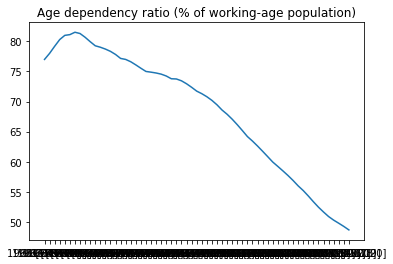

<Figure size 1440x1440 with 0 Axes>

In [49]:
plt.plot(df[c[0]],df[c[1]])
plt.title(c[1])
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

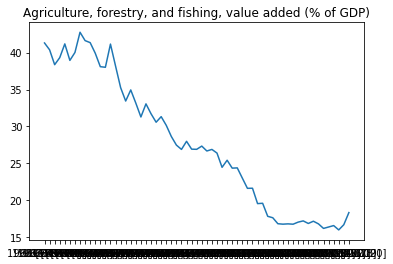

<Figure size 1440x1440 with 0 Axes>

In [50]:
plt.plot(df[c[0]],df[c[2]])
plt.title(c[2])
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

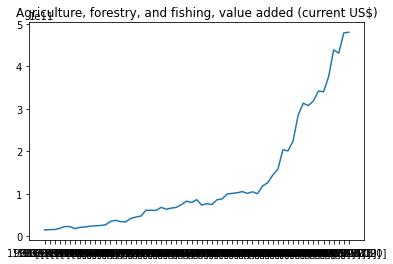

<Figure size 1440x1440 with 0 Axes>

In [51]:
plt.plot(df[c[0]],df[c[3]])
plt.title(c[3])
plt.figure(figsize=(20,20))

In [52]:
log_new = df.iloc[:,1:]
log_new = np.log(1.0+log_new)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [53]:
log_new

,Age dependency ratio (% of working-age population),"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (current US$)",Arms imports (SIPRI trend indicator values),Broad money (% of GDP),Broad money to total reserves ratio,Changes in inventories (current US$),"Claims on central government, etc. (% GDP)",Consumer price index (2010 = 100),Domestic credit to private sector (% of GDP),Domestic credit to private sector by banks (% of GDP),Exports of goods and services (% of GDP),Exports of goods and services (current US$),External balance on goods and services (% of GDP),External balance on goods and services (current US$),Final consumption expenditure (% of GDP),Final consumption expenditure (current US$),Fixed telephone subscriptions,Fixed telephone subscriptions (per 100 people),GDP (current US$),GDP deflator (base year varies by country),GDP per capita (current US$),General government final consumption expenditure (% of GDP),General government final consumption expenditure (current US$),GNI (current US$),Gross capital formation (% of GDP),Gross capital formation (current US$),Gross domestic savings (% of GDP),Gross domestic savings (current US$),Gross fixed capital formation (% of GDP),Gross fixed capital formation (current US$),Gross national expenditure (% of GDP),Gross national expenditure (current US$),Gross national expenditure deflator (base year varies by country),Gross value added at basic prices (GVA) (current US$),Households and NPISHs final consumption expenditure (% of GDP),Households and NPISHs Final consumption expenditure (current US$),Imports of goods and services (% of GDP),Imports of goods and services (current US$),"Industry (including construction), value added (% of GDP)","Industry (including construction), value added (current US$)","Inflation, consumer prices (annual %)","Manufacturing, value added (% of GDP)","Manufacturing, value added (current US$)",Merchandise exports (current US$),Merchandise imports (current US$),Merchandise trade (% of GDP),Military expenditure (% of GDP),Military expenditure (current USD),Monetary Sector credit to private sector (% GDP),Net primary income (Net income from abroad) (current US$),"Population ages 0-14, total",Population ages 15-64 (% of total population),"Population, female","Population, female (% of total population)","Population, male","Population, male (% of total population)","Population, total",Rural population,Rural population (% of total population),"Services, value added (% of GDP)",Taxes less subsidies on products (current US$),"Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),Trade (% of GDP),Urban population,Urban population (% of total population)
0,4.356697,3.745091,23.450994,20.114460,3.138617,2.573892,19.940535,2.772593,1.260586,2.179641,2.179641,1.698027,21.225677,NaN,NaN,4.553429,24.272663,12.714094,0.071182,24.334991,1.221547,4.421110,2.024654,21.612866,24.330900,2.814838,22.482874,1.951975,21.528653,2.737991,22.400924,4.706353,24.427095,1.270380,24.278462,4.481690,24.200132,2.058432,21.651684,3.083484,22.766424,1.022407,2.756848,22.421072,21.009947,21.557478,2.381063,1.099949,20.340197,2.179641,NaN,19.021003,4.051741,19.200203,3.899851,19.264421,3.962810,19.925974,19.728450,4.419756,3.683426,21.433864,20.329537,19.862883,2.509342,18.206945,2.940431
1,4.369538,3.722977,23.486117,20.838379,3.113599,2.614431,NaN,2.755273,1.272659,2.252993,2.252993,1.668383,21.247048,NaN,NaN,4.544780,24.321700,12.714094,0.071182,24.392770,1.236564,4.458459,2.066187,21.718348,24.387510,2.759059,22.481212,2.061826,21.713352,2.818754,22.544818,4.690657,24.469033,1.289174,24.332253,4.468721,24.244792,1.939831,21.572263,3.110615,22.852617,0.991477,2.794463,22.518965,21.049688,21.550069,2.337914,1.123097,20.433432,2.252993,NaN,19.047564,4.046161,19.219668,3.899342,19.284892,3.963287,19.945959,19.747118,4.418455,3.671883,21.557829,20.317336,19.850992,2.421360,18.232937,2.946122
2,4.38

<Figure size 720x720 with 0 Axes>

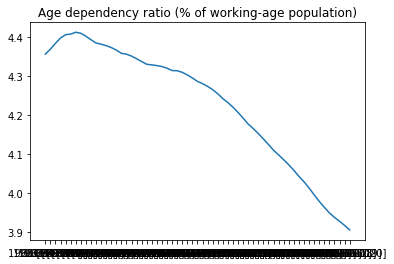

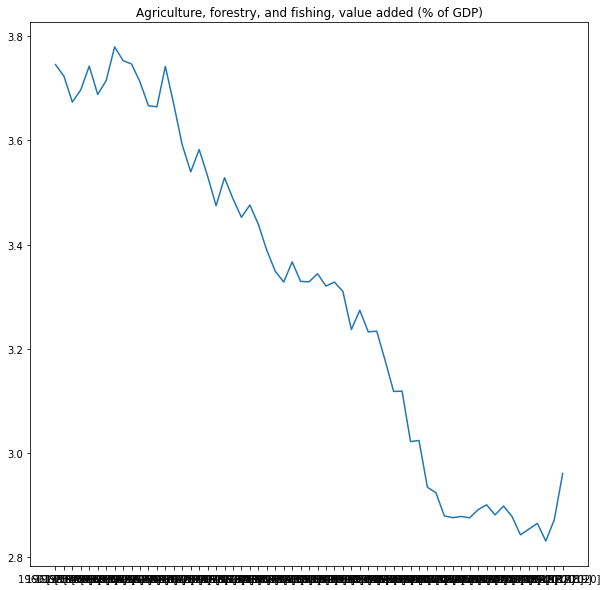

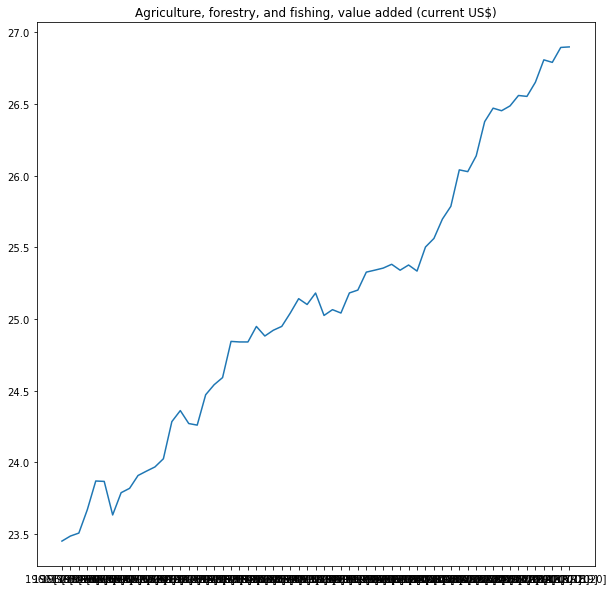

<Figure size 720x720 with 0 Axes>

In [54]:
plt.plot(df[c[0]],log_new[c[1]])
plt.title(c[1])
plt.figure(figsize=(10,10))
plt.plot(df[c[0]],log_new[c[2]])
plt.title(c[2])
plt.figure(figsize=(10,10))
plt.plot(df[c[0]],log_new[c[3]])
plt.title(c[3])
plt.figure(figsize=(10,10))

In [55]:
quantile_data = df.iloc[:,1:].T
pt = QuantileTransformer(output_distribution='normal')
quantile_data = pt.fit_transform(quantile_data)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (67). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


<Figure size 720x720 with 0 Axes>

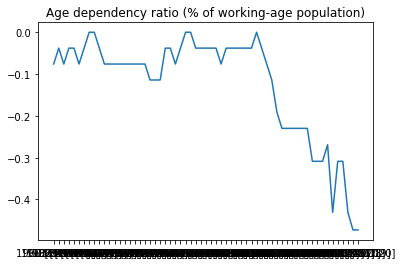

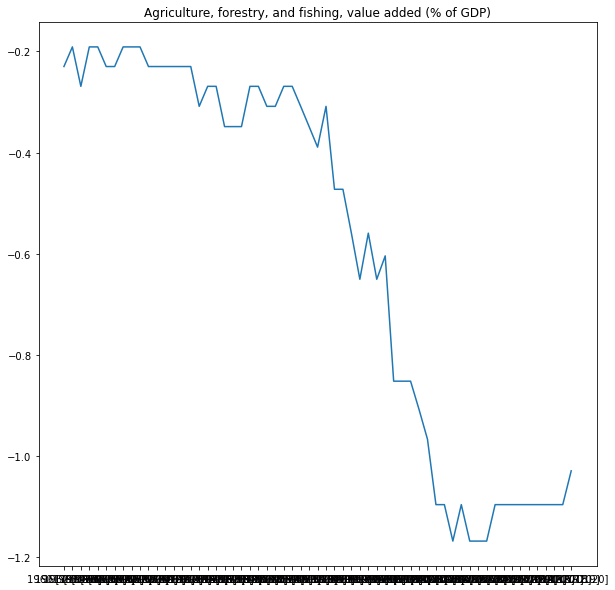

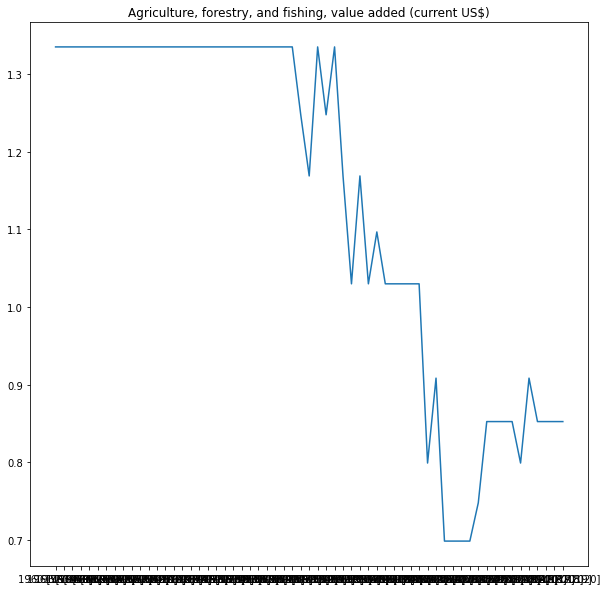

<Figure size 720x720 with 0 Axes>

In [56]:
plt.plot(df[c[0]],quantile_data[0])
plt.title(c[1])
plt.figure(figsize=(10,10))
plt.plot(df[c[0]],quantile_data[1])
plt.title(c[2])
plt.figure(figsize=(10,10))
plt.plot(df[c[0]],quantile_data[2])
plt.title(c[3])
plt.figure(figsize=(10,10))

In [57]:
yeo_data = df.iloc[:,1:].T
pt = PowerTransformer(method='yeo-johnson')
yeo_data = pt.fit_transform(yeo_data)

<Figure size 720x720 with 0 Axes>

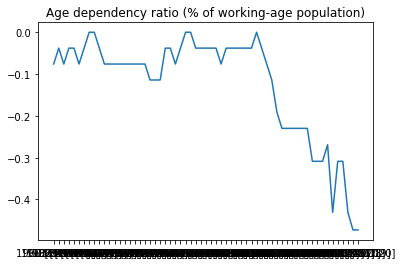

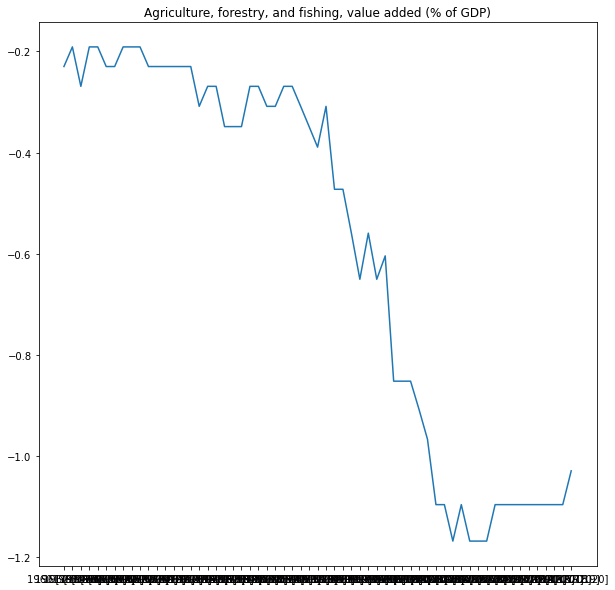

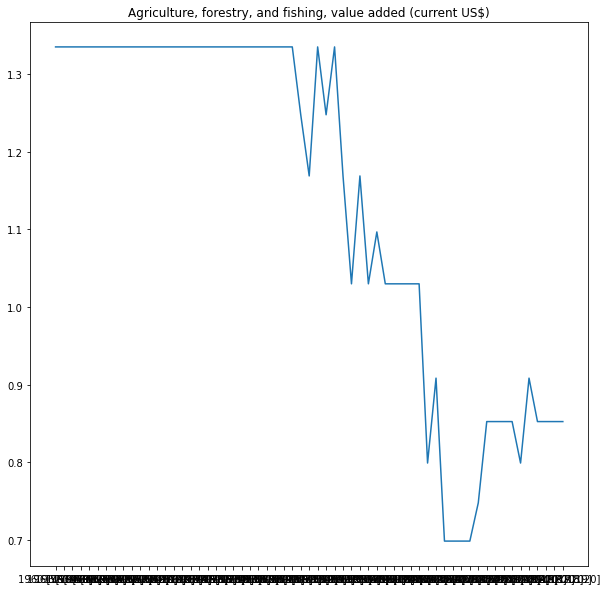

<Figure size 720x720 with 0 Axes>

In [58]:
plt.plot(df[c[0]],quantile_data[0])
plt.title(c[1])
plt.figure(figsize=(10,10))
plt.plot(df[c[0]],quantile_data[1])
plt.title(c[2])
plt.figure(figsize=(10,10))
plt.plot(df[c[0]],quantile_data[2])
plt.title(c[3])
plt.figure(figsize=(10,10))

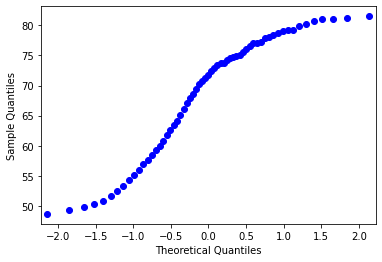

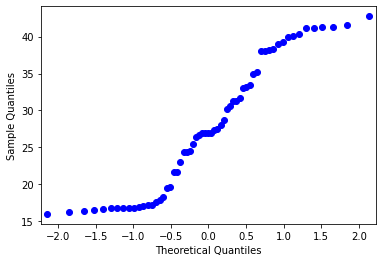

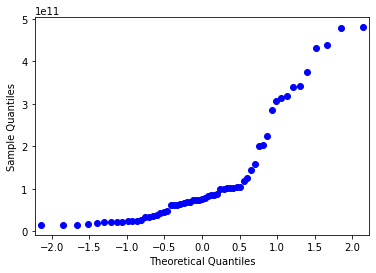

In [59]:
sm.qqplot(df.iloc[:,1])
plt.show()
sm.qqplot(df.iloc[:,2])
plt.show()
sm.qqplot(df.iloc[:,3])
plt.show()

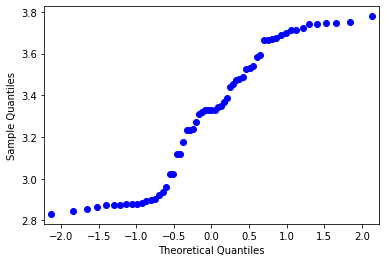

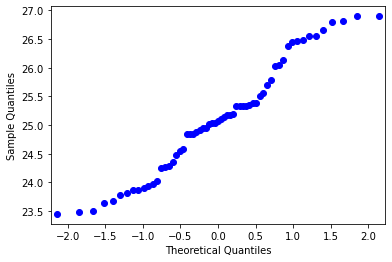

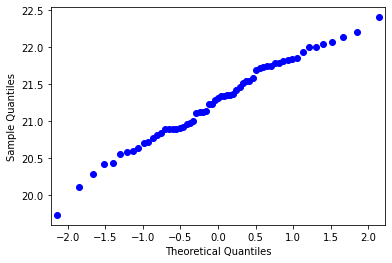

In [60]:
sm.qqplot(log_new.iloc[:,1])
plt.show()
sm.qqplot(log_new.iloc[:,2])
plt.show()
sm.qqplot(log_new.iloc[:,3])
plt.show()

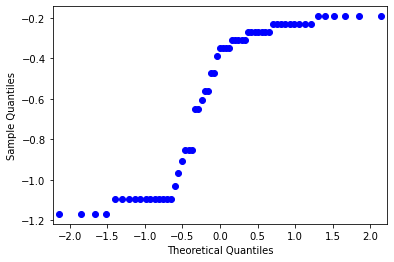

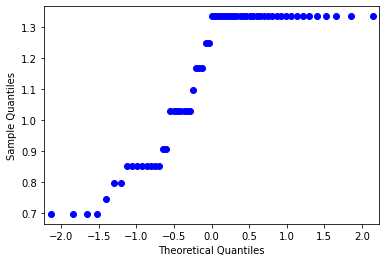

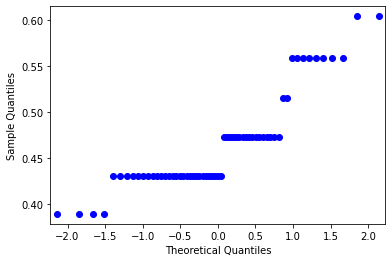

In [61]:
sm.qqplot(quantile_data[1])
plt.show()
sm.qqplot(quantile_data[2])
plt.show()
sm.qqplot(quantile_data[3])
plt.show()

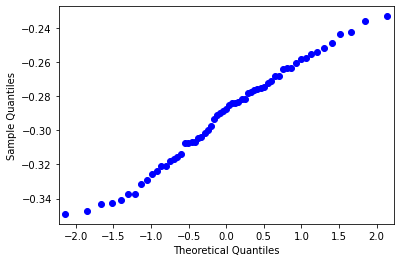

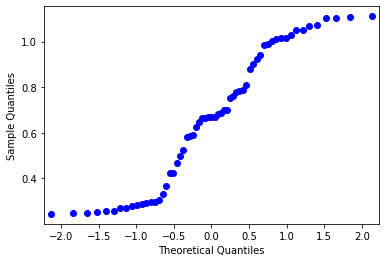

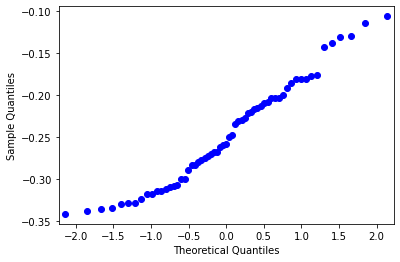

In [62]:
sm.qqplot(yeo_data[1])
plt.show()
sm.qqplot(yeo_data[2])
plt.show()
sm.qqplot(yeo_data[3])
plt.show()

In [63]:
df.kurtosis()

Age dependency ratio (% of working-age population)              -1.044546
Agriculture, forestry, and fishing, value added (% of GDP)      -1.355944
Agriculture, forestry, and fishing, value added (current US$)    1.120919
Arms imports (SIPRI trend indicator values)                      0.370350
Broad money (% of GDP)                                          -1.232960
                                                                   ...   
Total reserves (includes gold, current US$)                      1.189566
Total reserves minus gold (current US$)                          1.130611
Trade (% of GDP)                                                -0.766570
Urban population                                                -1.051298
Urban population (% of total population)                        -1.031869
Length: 67, dtype: float64

In [64]:
df.skew()

Age dependency ratio (% of working-age population)              -0.547876
Agriculture, forestry, and fishing, value added (% of GDP)       0.186145
Agriculture, forestry, and fishing, value added (current US$)    1.487342
Arms imports (SIPRI trend indicator values)                      0.864495
Broad money (% of GDP)                                           0.352047
                                                                   ...   
Total reserves (includes gold, current US$)                      1.504361
Total reserves minus gold (current US$)                          1.491047
Trade (% of GDP)                                                 0.817424
Urban population                                                 0.405969
Urban population (% of total population)                         0.139920
Length: 67, dtype: float64

In [65]:
log_new.kurtosis()

Age dependency ratio (% of working-age population)              -0.817131
Agriculture, forestry, and fishing, value added (% of GDP)      -1.423825
Agriculture, forestry, and fishing, value added (current US$)   -0.861330
Arms imports (SIPRI trend indicator values)                     -0.320127
Broad money (% of GDP)                                          -1.304061
                                                                   ...   
Total reserves (includes gold, current US$)                     -1.227802
Total reserves minus gold (current US$)                         -1.310656
Trade (% of GDP)                                                -1.294029
Urban population                                                -1.203750
Urban population (% of total population)                        -1.086810
Length: 67, dtype: float64

In [66]:
log_new.skew()

Age dependency ratio (% of working-age population)              -0.706074
Agriculture, forestry, and fishing, value added (% of GDP)      -0.108643
Agriculture, forestry, and fishing, value added (current US$)    0.165360
Arms imports (SIPRI trend indicator values)                     -0.270735
Broad money (% of GDP)                                          -0.128781
                                                                   ...   
Total reserves (includes gold, current US$)                      0.029557
Total reserves minus gold (current US$)                          0.070340
Trade (% of GDP)                                                 0.304663
Urban population                                                -0.205169
Urban population (% of total population)                        -0.118445
Length: 67, dtype: float64

In [67]:
pd.DataFrame(quantile_data).kurtosis()

0     6.007250
1     6.044451
2     6.027131
3     6.027131
4     6.027279
        ...   
56    6.026572
57    6.026572
58    6.026542
59    6.026542
60    6.026516
Length: 61, dtype: float64

In [68]:
pd.DataFrame(quantile_data).skew()

0     0.001744
1    -0.001754
2     0.000036
3     0.000036
4     0.000045
        ...   
56    0.000007
57    0.000007
58    0.000005
59    0.000005
60    0.000004
Length: 61, dtype: float64

In [69]:
pd.DataFrame(yeo_data).kurtosis()

0     8.394609
1     5.874961
2     7.896080
3     6.891853
4     7.893495
        ...   
56    5.168977
57    7.178635
58    7.428447
59    7.049049
60    7.312307
Length: 61, dtype: float64

In [70]:
pd.DataFrame(yeo_data).kurtosis()

0     8.394609
1     5.874961
2     7.896080
3     6.891853
4     7.893495
        ...   
56    5.168977
57    7.178635
58    7.428447
59    7.049049
60    7.312307
Length: 61, dtype: float64

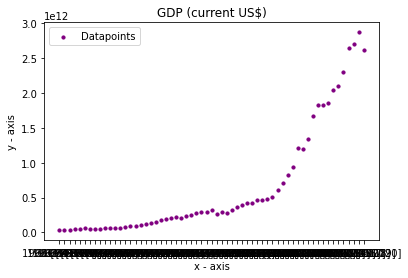

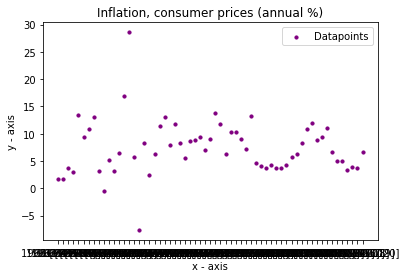

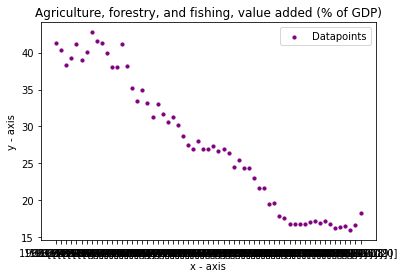

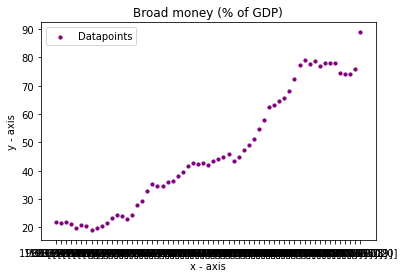

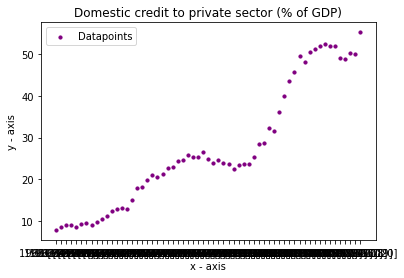

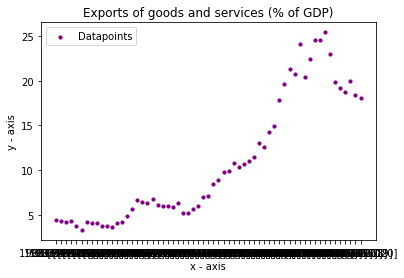

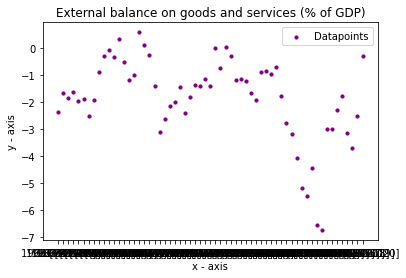

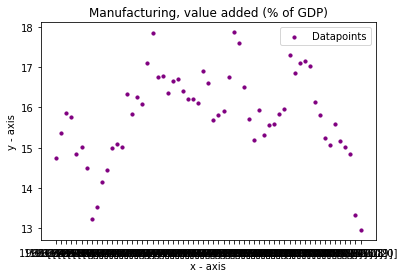

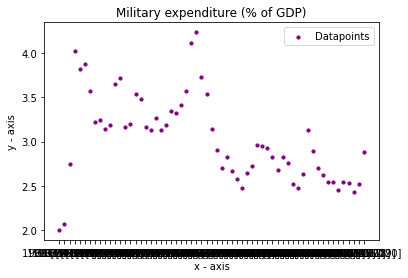

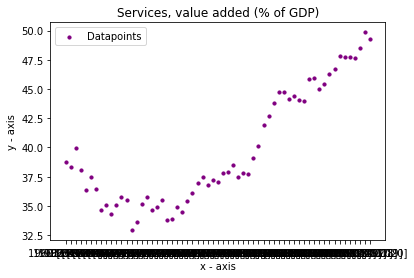

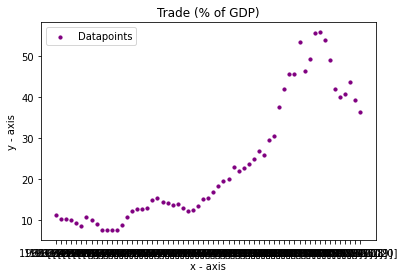

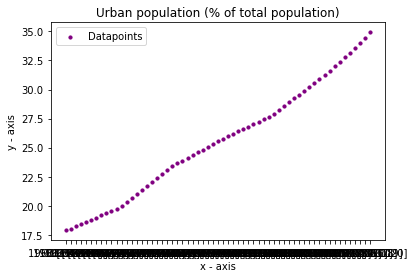

In [71]:
#This is a dictionary containing some important features (Manually choosen) for which plots will be drawn.
select_col= ["GDP (current US$)",'Inflation, consumer prices (annual %)',"Agriculture, forestry, and fishing, value added (% of GDP)", "Broad money (% of GDP)","Domestic credit to private sector (% of GDP)", "Exports of goods and services (% of GDP)", "External balance on goods and services (% of GDP)","Manufacturing, value added (% of GDP)","Military expenditure (% of GDP)", "Services, value added (% of GDP)", "Trade (% of GDP)", "Urban population (% of total population)"]        
for i in select_col:
    x = df[c[0]]
    y = df[i]
    plt.scatter(x, y, label= "Datapoints", color= "purple",marker= "o", s=10)
    plt.xlabel('x - axis')
    plt.ylabel('y - axis')
    plt.title(i)
    plt.legend()
    plt.show()

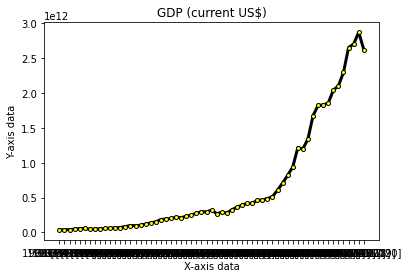

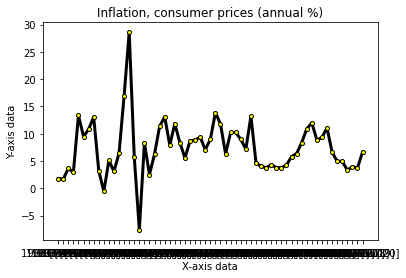

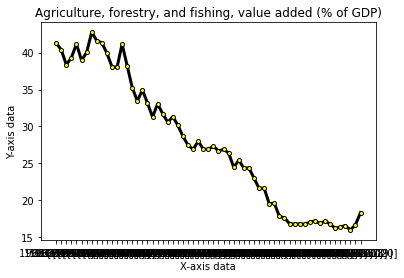

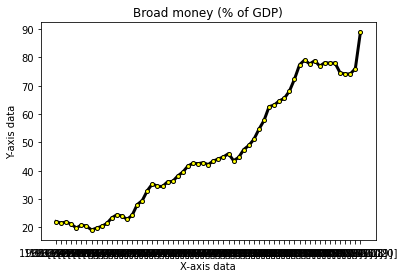

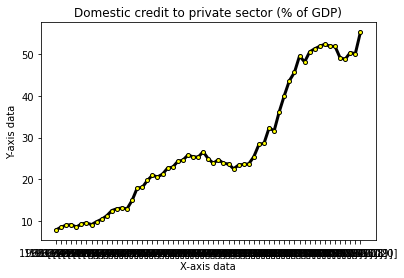

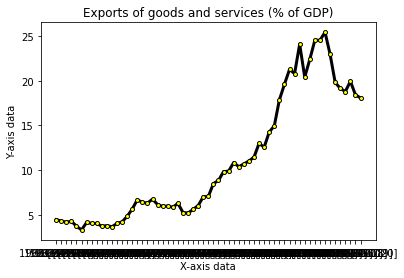

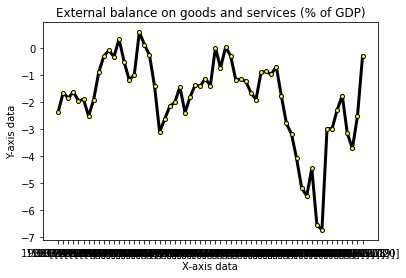

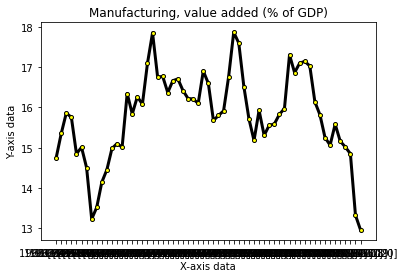

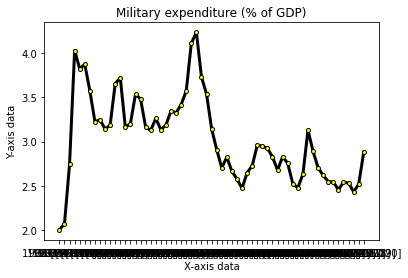

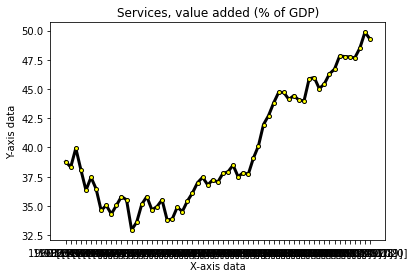

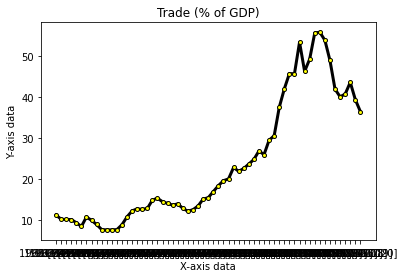

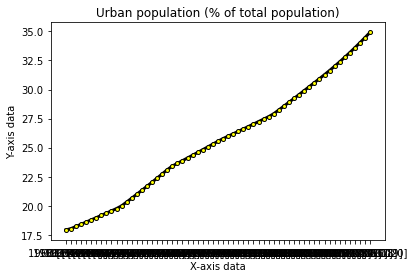

In [72]:
for i in select_col:
    x = np.array(df[c[0]])
    y = np.array(df[i])
    plt.plot(x, np.transpose(y), color='black', linestyle='-', linewidth = 3,marker='o', markerfacecolor='yellow', markersize=4)
    plt.xlabel("X-axis data")
    plt.ylabel("Y-axis data")
    plt.title(i)
    plt.show()

In [73]:
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

{'boxes': [<matplotlib.lines.Line2D at 0x7f2382288a90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2382a6c650>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f23829dfd50>],
 'means': [<matplotlib.lines.Line2D at 0x7f238299d090>],
 'medians': [<matplotlib.lines.Line2D at 0x7f238299d390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2382a6c3d0>,
  <matplotlib.lines.Line2D at 0x7f2382a6cd10>]}

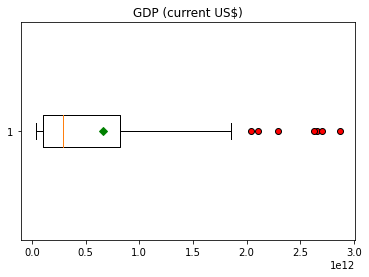

In [74]:
plt.title(select_col[0])
plt.boxplot(x=df[select_col[0]], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape)

{'boxes': [<matplotlib.lines.Line2D at 0x7f23828ef950>],
 'caps': [<matplotlib.lines.Line2D at 0x7f23825a6e90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f238253eb90>],
 'means': [<matplotlib.lines.Line2D at 0x7f2382a3fb10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2382a3ff50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f23825a6090>,
  <matplotlib.lines.Line2D at 0x7f23825a66d0>]}

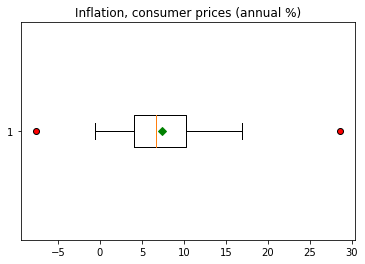

In [75]:
plt.title(select_col[1])
plt.boxplot(x=df[select_col[1]], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape,)

{'boxes': [<matplotlib.lines.Line2D at 0x7f2382a44610>],
 'caps': [<matplotlib.lines.Line2D at 0x7f23826b0090>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f238277f7d0>],
 'means': [<matplotlib.lines.Line2D at 0x7f238277f5d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f238277f850>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2382a44b10>,
  <matplotlib.lines.Line2D at 0x7f23826b0d50>]}

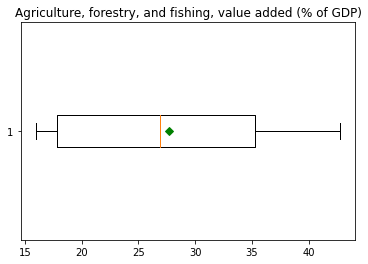

In [76]:
plt.title(select_col[2])
plt.boxplot(x=df[select_col[2]], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape,)

{'boxes': [<matplotlib.lines.Line2D at 0x7f2383051410>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2382fb37d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f23828cfa10>],
 'means': [<matplotlib.lines.Line2D at 0x7f23827160d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2382716f50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2382fb3a50>,
  <matplotlib.lines.Line2D at 0x7f2382fb3bd0>]}

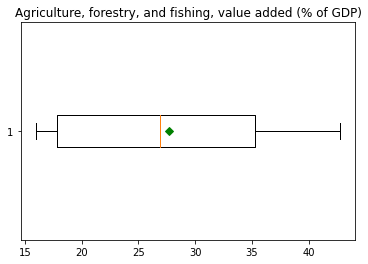

In [77]:
plt.title(select_col[2])
plt.boxplot(x=df[select_col[2]], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape,)

{'boxes': [<matplotlib.lines.Line2D at 0x7f2382654d90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2382621dd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2382592390>],
 'means': [<matplotlib.lines.Line2D at 0x7f238263ae10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f238263a8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2382621350>,
  <matplotlib.lines.Line2D at 0x7f2382621890>]}

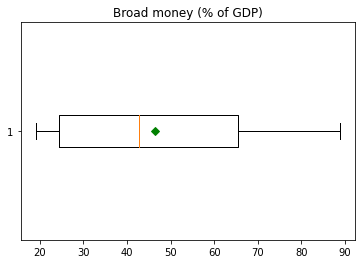

In [78]:
plt.title(select_col[3])
plt.boxplot(x=df[select_col[3]], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape,)

{'boxes': [<matplotlib.lines.Line2D at 0x7f238305b0d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f23827938d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f238280a6d0>],
 'means': [<matplotlib.lines.Line2D at 0x7f2382993510>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2382a8d690>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2382682950>,
  <matplotlib.lines.Line2D at 0x7f2382ffc850>]}

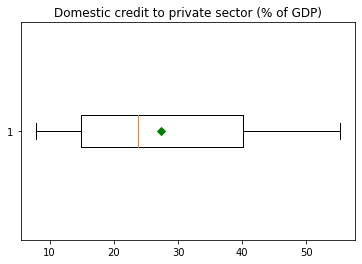

In [79]:
plt.title(select_col[4])
plt.boxplot(x=df[select_col[4]], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape,)

{'boxes': [<matplotlib.lines.Line2D at 0x7f238301e6d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2382b06b90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2382551a50>],
 'means': [<matplotlib.lines.Line2D at 0x7f2382551410>],
 'medians': [<matplotlib.lines.Line2D at 0x7f23a4a7e150>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f238301ee50>,
  <matplotlib.lines.Line2D at 0x7f238301ea90>]}

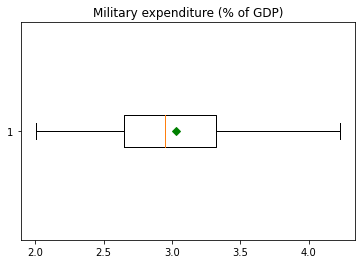

In [80]:
plt.title(select_col[8])
plt.boxplot(x=df[select_col[8]], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape,)

In [81]:
df.corr()

,Age dependency ratio (% of working-age population),"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (current US$)",Arms imports (SIPRI trend indicator values),Broad money (% of GDP),Broad money to total reserves ratio,Changes in inventories (current US$),"Claims on central government, etc. (% GDP)",Consumer price index (2010 = 100),Domestic credit to private sector (% of GDP),Domestic credit to private sector by banks (% of GDP),Exports of goods and services (% of GDP),Exports of goods and services (current US$),External balance on goods and services (% of GDP),External balance on goods and services (current US$),Final consumption expenditure (% of GDP),Final consumption expenditure (current US$),Fixed telephone subscriptions,Fixed telephone subscriptions (per 100 people),GDP (current US$),GDP deflator (base year varies by country),GDP per capita (current US$),General government final consumption expenditure (% of GDP),General government final consumption expenditure (current US$),GNI (current US$),Gross capital formation (% of GDP),Gross capital formation (current US$),Gross domestic savings (% of GDP),Gross domestic savings (current US$),Gross fixed capital formation (% of GDP),Gross fixed capital formation (current US$),Gross national expenditure (% of GDP),Gross national expenditure (current US$),Gross national expenditure deflator (base year varies by country),Gross value added at basic prices (GVA) (current US$),Households and NPISHs final consumption expenditure (% of GDP),Households and NPISHs Final consumption expenditure (current US$),Imports of goods and services (% of GDP),Imports of goods and services (current US$),"Industry (including construction), value added (% of GDP)","Industry (including construction), value added (current US$)","Inflation, consumer prices (annual %)","Manufacturing, value added (% of GDP)","Manufacturing, value added (current US$)",Merchandise exports (current US$),Merchandise imports (current US$),Merchandise trade (% of GDP),Military expenditure (% of GDP),Military expenditure (current USD),Monetary Sector credit to private sector (% GDP),Net primary income (Net income from abroad) (current US$),"Population ages 0-14, total",Population ages 15-64 (% of total population),"Population, female","Population, female (% of total population)","Population, male","Population, male (% of total population)","Population, total",Rural population,Rural population (% of total population),"Services, value added (% of GDP)",Taxes less subsidies on products (current US$),"Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),Trade (% of GDP),Urban population,Urban population (% of total population)
Age dependency ratio (% of working-age population),1.000000,0.940081,-0.928997,-0.468926,-0.980326,0.715890,-0.746468,-0.751023,-0.961466,-0.966714,-0.966714,-0.945735,-0.910484,0.525544,0.768736,0.923902,-0.921067,-0.814473,-0.759192,-0.925105,-0.977141,-0.936143,-0.592720,-0.920441,-0.925373,-0.869070,-0.928817,-0.923902,-0.928290,-0.885528,-0.932009,0.604739,-0.927469,-0.980704,-0.926529,0.915860,-0.920696,-0.918535,-0.902892,-0.673983,-0.937435,0.104705,0.014067,-0.937201,-0.908317,-0.893580,-0.907362,0.602094,-0.931875,-0.966714,0.844026,-0.863234,-0.998754,-0.979376,0.847435,-0.979138,-0.847435,-0.979253,-0.962542,0.975656,-0.941342,-0.900555,-0.906258,-0.906007,-0.933595,-0.992534,-0.975656
"Agriculture, forestry, and fishing, value added (% of GDP)",0.940081,1.000000,-0.785590,-0.490146,-0.966454,0.725675,-0.674792,-0.818657,-0.828152,-0.936184,-0.936184,-0.905586,-0.753456,0.490969,0.665612,0.968288,-0.768650,-0.850364,-0.823499,-0.773159,-0.860872,-0.798051,-0.748668,-0.766343,-0.773658,-0.927482,-0.789053,-0.968288,-0.778278,-0.960464,-0.789169,0.588556,-0.778634,-0.869245,-0.775163,0.976472,-0.768683,-0.877203,-0.751726,-0.860713,-0.800087,0.082518,-0.234918,-0.800189,-0.756617,-0.743739,-0.867287,0.492446,-0

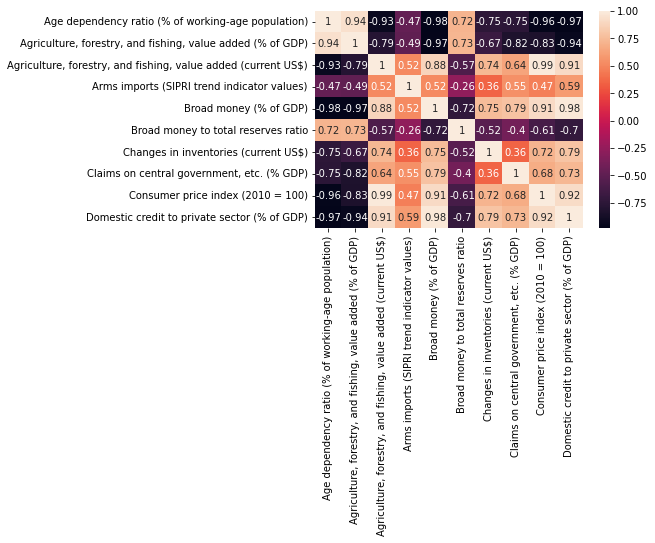

In [82]:
sns.heatmap(df.corr().iloc[:10,:10],annot=True)

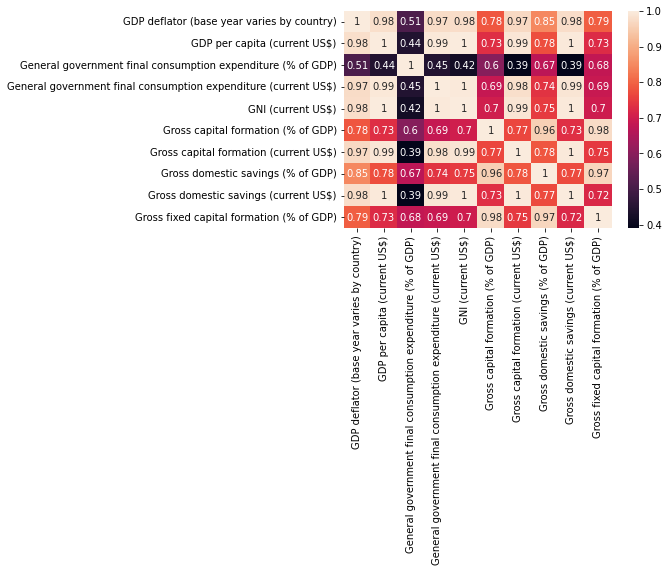

In [83]:
sns.heatmap(df.corr().iloc[20:30,20:30],annot=True)

In [84]:
X = np.array(df.iloc[:,1:63]).T

In [85]:
X

array([[7.69990446e+01, 7.80071064e+01, 7.91875306e+01, ...,
        4.97751669e+01, 4.92452418e+01, 4.86646203e+01],
       [4.13128391e+01, 4.03874016e+01, 3.83713352e+01, ...,
        1.59701575e+01, 1.66774624e+01, 1.83189877e+01],
       [1.52980963e+10, 1.58449614e+10, 1.61779235e+10, ...,
        4.31371805e+11, 4.78727241e+11, 4.80504068e+11],
       ...,
       [8.20760000e+01, 8.19680000e+01, 8.17820000e+01, ...,
        6.59700000e+01, 6.55280000e+01, 6.50740000e+01],
       [3.87824618e+01, 3.83258752e+01, 3.99358450e+01, ...,
        4.85097166e+01, 4.98595589e+01, 4.92663781e+01],
       [2.03520873e+09, 2.30380816e+09, 2.67489811e+09, ...,
        2.46806721e+11, 2.66537320e+11, 2.41731435e+11]])

In [86]:
pca = PCA(n_components=61,svd_solver='full')

In [87]:
pca.fit_transform(X)

array([[-1.00789814e+12, -1.97682280e+10, -6.18433013e+08, ...,
        -7.43232110e-07,  4.63765907e-07,  2.03665368e-05],
       [-1.00789814e+12, -1.97682279e+10, -6.18433140e+08, ...,
        -4.78484864e-07,  4.20516857e-07,  4.21336293e-06],
       [ 3.88561890e+11, -1.20497612e+11,  5.39086190e+10, ...,
        -4.84137379e-07,  4.25394461e-07,  4.42913748e-06],
       ...,
       [-1.00789814e+12, -1.97682280e+10, -6.18433002e+08, ...,
        -3.49880384e-07,  4.60484551e-07,  2.46847004e-06],
       [-1.00789814e+12, -1.97682279e+10, -6.18433106e+08, ...,
        -4.84232317e-07,  4.21065350e-07,  4.17276053e-06],
       [-3.15094409e+11, -8.04149425e+10, -2.51931016e+10, ...,
        -4.82444602e-07,  4.27133489e-07,  4.07601618e-06]])

In [88]:
print(pca.explained_variance_ratio_)

[9.97419214e-01 2.05042086e-03 2.57376993e-04 1.40015106e-04
 5.11984749e-05 3.57939998e-05 1.43235703e-05 1.41701478e-05
 6.95503152e-06 4.41507273e-06 2.17295462e-06 1.90720636e-06
 1.35096502e-06 3.01096044e-07 2.81678513e-07 5.73407208e-08
 4.00245802e-08 5.93533471e-09 1.14065682e-11 1.37874659e-12
 2.68861743e-13 3.73900424e-15 2.15237262e-18 5.79874688e-24
 2.70232311e-24 1.29433530e-24 6.61386892e-25 5.51412859e-25
 3.82229071e-25 2.23971893e-25 1.54995771e-25 1.15219879e-25
 6.77620620e-26 3.41425117e-26 2.31949999e-26 1.73456207e-26
 1.45418355e-26 9.10976715e-27 8.43694143e-27 5.90798877e-27
 4.55389311e-27 3.44612730e-27 1.49547420e-27 9.77134872e-28
 7.37096369e-28 5.64060874e-28 3.37999338e-28 2.67582869e-29
 2.42349439e-30 1.64916961e-31 5.35087317e-32 1.17604412e-32
 9.21037227e-33 9.21037227e-33 9.21037227e-33 9.21037227e-33
 9.21037227e-33 9.21037227e-33 9.21037227e-33 9.21037227e-33
 7.23399753e-34]


In [89]:
print(pca.singular_values_)

[1.69118605e+13 7.66785740e+11 2.71667310e+11 2.00373354e+11
 1.21166073e+11 1.01311241e+11 6.40882132e+10 6.37440585e+10
 4.46582883e+10 3.55812706e+10 2.49619121e+10 2.33857534e+10
 1.96822423e+10 9.29191110e+09 8.98730294e+09 4.05493685e+09
 3.38778557e+09 1.30459326e+09 5.71913071e+07 1.98835876e+07
 8.78045510e+06 1.03545326e+06 2.48434125e+04 4.07774062e+01
 2.78369186e+01 1.92653064e+01 1.37714704e+01 1.25745070e+01
 1.04692213e+01 8.01399897e+00 6.66672354e+00 5.74799298e+00
 4.40804306e+00 3.12896176e+00 2.57899030e+00 2.23021865e+00
 2.04203008e+00 1.61624115e+00 1.55541054e+00 1.30158445e+00
 1.14273081e+00 9.94072774e-01 6.54850229e-01 5.29333985e-01
 4.59742505e-01 4.02175407e-01 3.11322455e-01 8.75954755e-02
 2.63617071e-02 6.87678082e-03 3.91710173e-03 1.83638751e-03
 1.62514125e-03 1.62514125e-03 1.62514125e-03 1.62514125e-03
 1.62514125e-03 1.62514125e-03 1.62514125e-03 1.62514125e-03
 4.55451042e-04]



Claim has been made that Military expenditure is correlated to GDP by greater than or equal to 0.5


In [90]:
test= ['GDP per capita (current US$)','Military expenditure (current USD)']

In [91]:
df[test].corr()

,GDP per capita (current US$),Military expenditure (current USD)
GDP per capita (current US$),1.000000,0.996706
Military expenditure (current USD),0.996706,1.000000


In [92]:
r = 0.997
r0 = 0.5
t = (r-r0)/np.sqrt( (1-np.square(r)) / (df.shape[0]-2) )

In [93]:
t

49.3210978118634

In [94]:
pval = scipy.stats.norm.sf(t)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


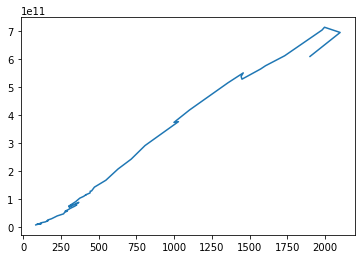

In [95]:
plt.plot(df['GDP per capita (current US$)'],df['Industry (including construction), value added (current US$)'])

In [96]:
def chi_square(atr1,atr2):
    data_crosstab = pd.crosstab(df[atr1],df[atr2],margins=True, margins_name="Total")
    x = 0
    rows = df[atr1].unique()
    columns = df[atr2].unique()
    for i in columns:
        for j in rows:
            O = data_crosstab[i][j]
            E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
            x += ((O-E)**2) /E
    print(x)
    return x

In [97]:
df.columns

Index(['Unnamed: 0', 'Age dependency ratio (% of working-age population)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Agriculture, forestry, and fishing, value added (current US$)',
       'Arms imports (SIPRI trend indicator values)', 'Broad money (% of GDP)',
       'Broad money to total reserves ratio',
       'Changes in inventories (current US$)',
       'Claims on central government, etc. (% GDP)',
       'Consumer price index (2010 = 100)',
       'Domestic credit to private sector (% of GDP)',
       'Domestic credit to private sector by banks (% of GDP)',
       'Exports of goods and services (% of GDP)',
       'Exports of goods and services (current US$)',
       'External balance on goods and services (% of GDP)',
       'External balance on goods and services (current US$)',
       'Final consumption expenditure (% of GDP)',
       'Final consumption expenditure (current US$)',
       'Fixed telephone subscriptions',
       'Fixed telephon

In [98]:
x = chi_square('Gross national expenditure (current US$)','Industry (including construction), value added (current US$)')
p = 1 - scipy.stats.norm.cdf(x, 3600)
print(p)
if x<=0.05:
    print("Dependent")
else:
    print("Indipendent")


3659.9999999997367
0.0
Indipendent


In [99]:
df[['GDP per capita (current US$)','Industry (including construction), value added (current US$)']].corr()

,GDP per capita (current US$),"Industry (including construction), value added (current US$)"
GDP per capita (current US$),1.000000,0.996362
"Industry (including construction), value added (current US$)",0.996362,1.000000


In [100]:
new = df.iloc[47:50]

In [101]:
new

,Unnamed: 0,Age dependency ratio (% of working-age population),"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (current US$)",Arms imports (SIPRI trend indicator values),Broad money (% of GDP),Broad money to total reserves ratio,Changes in inventories (current US$),"Claims on central government, etc. (% GDP)",Consumer price index (2010 = 100),Domestic credit to private sector (% of GDP),Domestic credit to private sector by banks (% of GDP),Exports of goods and services (% of GDP),Exports of goods and services (current US$),External balance on goods and services (% of GDP),External balance on goods and services (current US$),Final consumption expenditure (% of GDP),Final consumption expenditure (current US$),Fixed telephone subscriptions,Fixed telephone subscriptions (per 100 people),GDP (current US$),GDP deflator (base year varies by country),GDP per capita (current US$),General government final consumption expenditure (% of GDP),General government final consumption expenditure (current US$),GNI (current US$),Gross capital formation (% of GDP),Gross capital formation (current US$),Gross domestic savings (% of GDP),Gross domestic savings (current US$),Gross fixed capital formation (% of GDP),Gross fixed capital formation (current US$),Gross national expenditure (% of GDP),Gross national expenditure (current US$),Gross national expenditure deflator (base year varies by country),Gross value added at basic prices (GVA) (current US$),Households and NPISHs final consumption expenditure (% of GDP),Households and NPISHs Final consumption expenditure (current US$),Imports of goods and services (% of GDP),Imports of goods and services (current US$),"Industry (including construction), value added (% of GDP)","Industry (including construction), value added (current US$)","Inflation, consumer prices (annual %)","Manufacturing, value added (% of GDP)","Manufacturing, value added (current US$)",Merchandise exports (current US$),Merchandise imports (current US$),Merchandise trade (% of GDP),Military expenditure (% of GDP),Military expenditure (current USD),Monetary Sector credit to private sector (% GDP),Net primary income (Net income from abroad) (current US$),"Population ages 0-14, total",Population ages 15-64 (% of total population),"Population, female","Population, female (% of total population)","Population, male","Population, male (% of total population)","Population, total",Rural population,Rural population (% of total population),"Services, value added (% of GDP)",Taxes less subsidies on products (current US$),"Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),Trade (% of GDP),Urban population,Urban population (% of total population)
47,2007 [YR2007],58.472050,16.750120,2.038046e+11,2.275000e+09,72.280424,3.179795,6.078493e+10,16.220406,74.324964,45.627765,45.627765,20.799700,2.530773e+11,-4.086869,-4.972639e+10,65.622627,7.984538e+11,39250000.0,3.317249,1.216735e+12,71.191067,1028.334772,9.862116,1.199959e+11,1.211641e+12,41.930827,5.101872e+11,34.377373,4.182817e+11,35.812878,4.357480e+11,107.553454,1.308641e+12,73.078109,1.115278e+12,55.760511,6.784579e+11,24.886569,3.028037e+11,30.903238,3.760107e+11,6.372881,16.864568,2.051972e+11,1.501590e+11,2.293700e+11,31.192401,2.478248,2.825477e+10,45.627765,-5.094795e+09,378748574.0,63.102610,567579951.0,47.969524,615629520.0,52.030476,1.183209e+09,829358847.0,70.094,44.008158,1.014573e+11,2.765781e+11,2.669883e+11,45.686269,353850624.0,29.906
48,2008 [YR2008],57.705703,16.790942,2.013059e+11,1.858000e+09,77.372956,3.603493,2.145105e+10,19.485752,80.530554,49.559367,49.559367,24.097357,2.889022e+11,-5.173506,-6.202493e+10,67.215297,8.058412e+11,37900000.0,3.156572,1.198896e+12,77.736352,998.522342,10.538481,1.263454e+11,1.191737e+12,37.850550,4.537886e+11,32.784703,3.930544e+11,34.717959,4.162321e+11,105.065847,1.259630e+12,79.107063,1.124686e+12,56.676816,6.794958e+11,29.270863,3.509271e+11,31

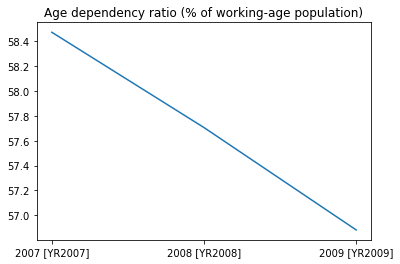

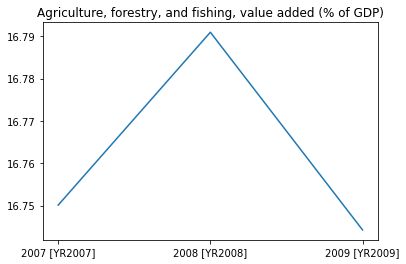

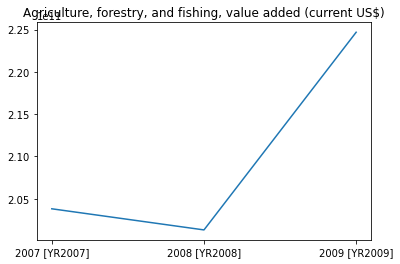

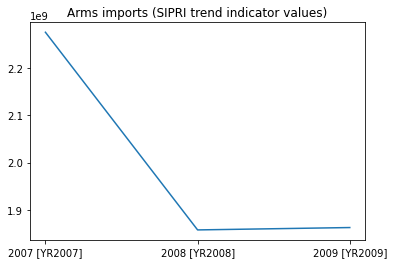

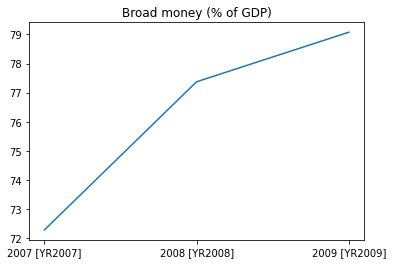

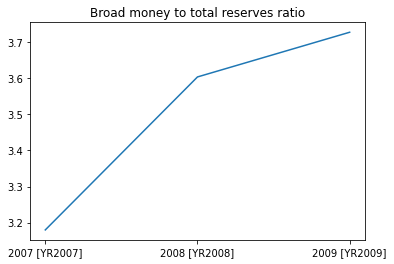

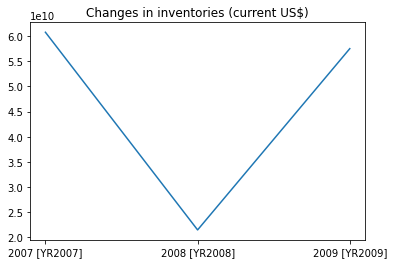

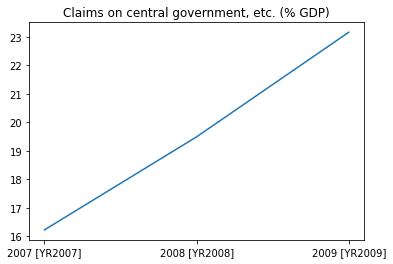

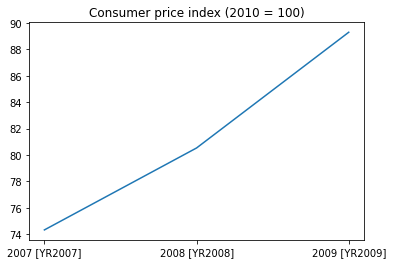

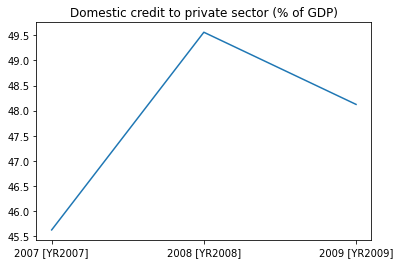

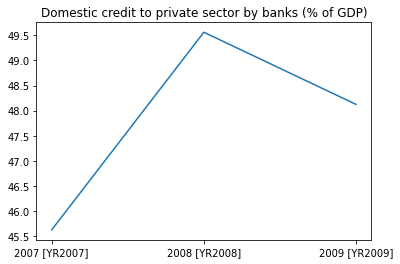

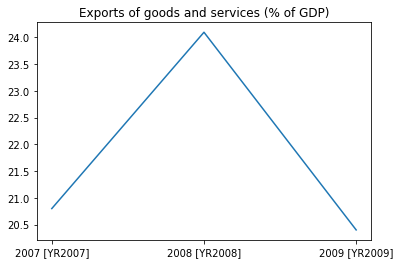

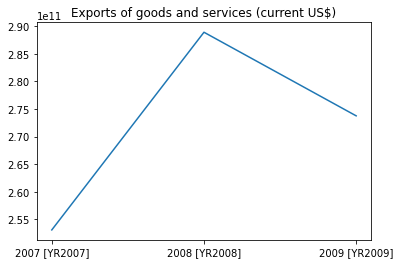

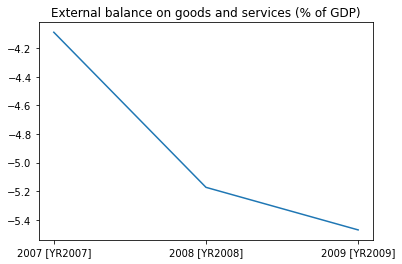

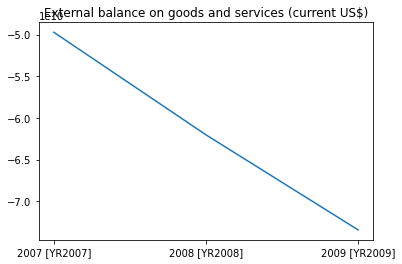

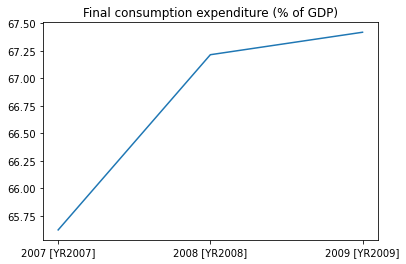

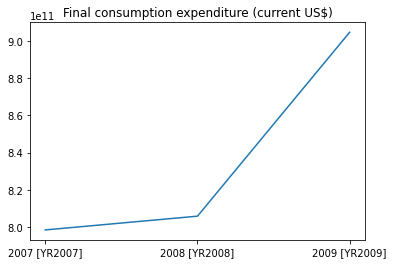

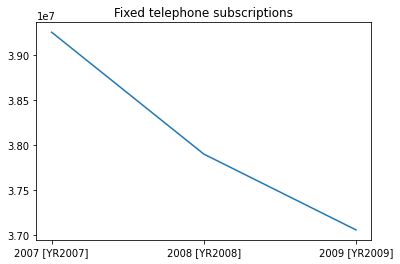

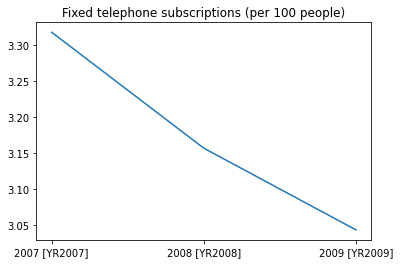

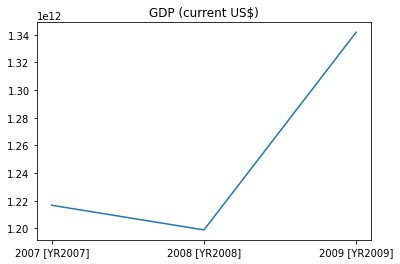

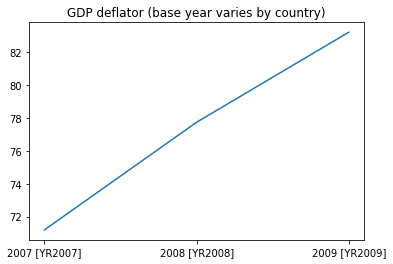

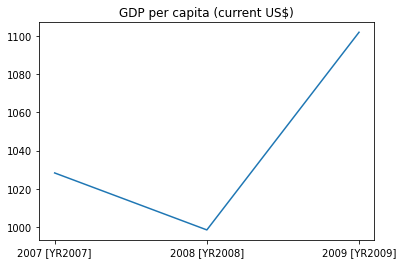

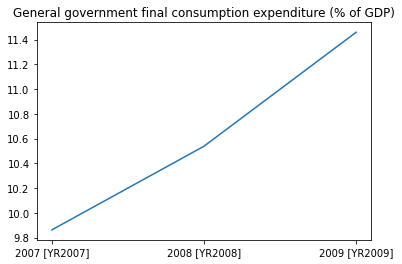

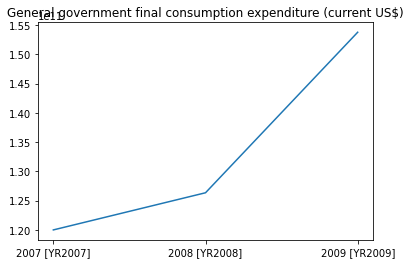

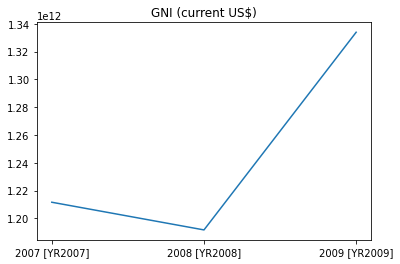

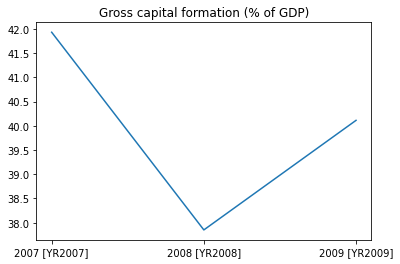

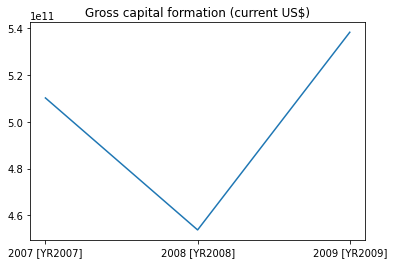

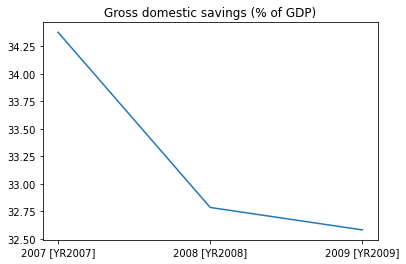

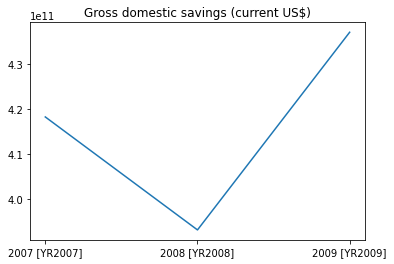

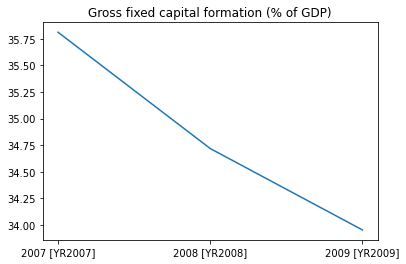

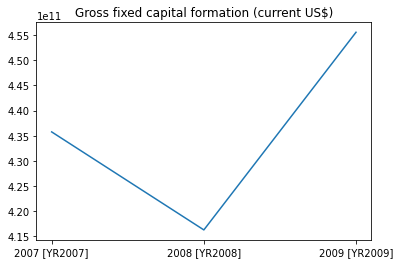

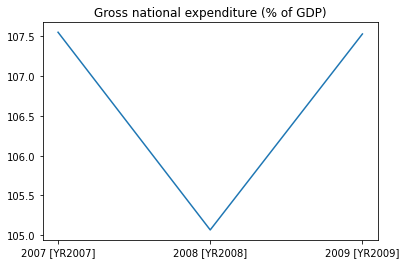

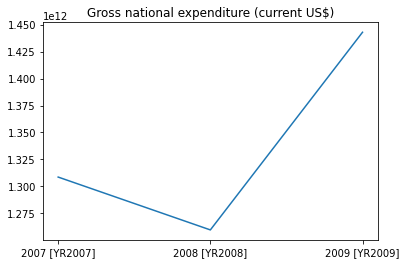

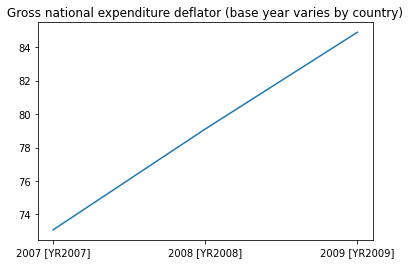

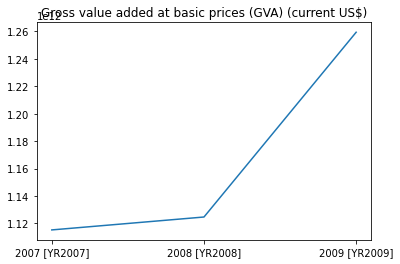

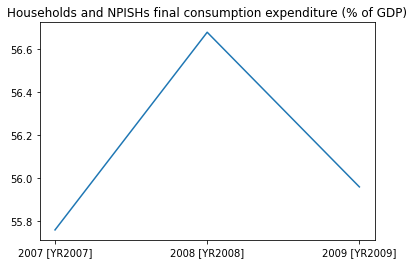

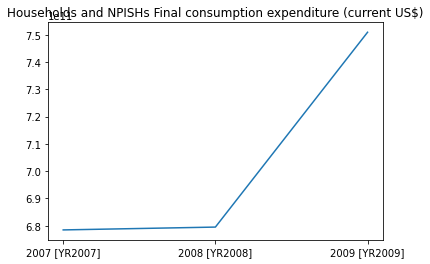

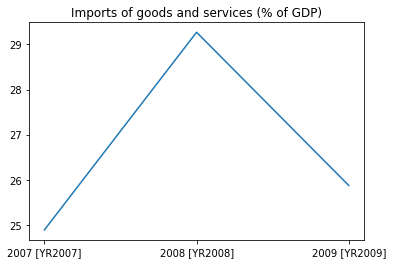

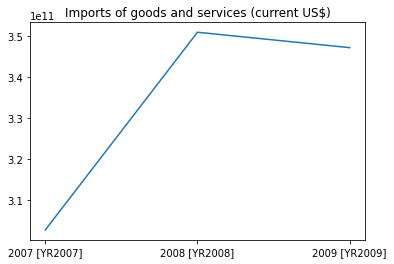

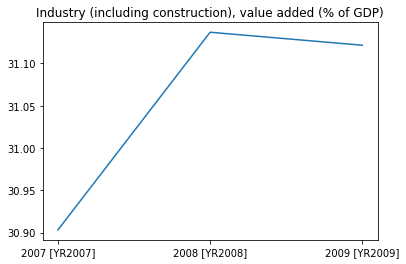

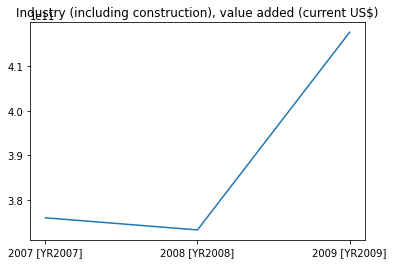

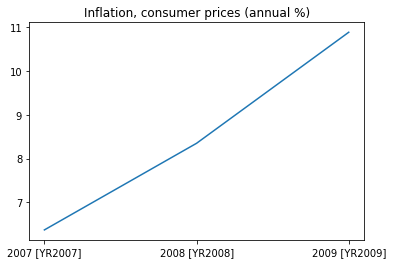

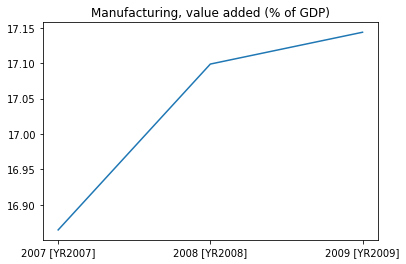

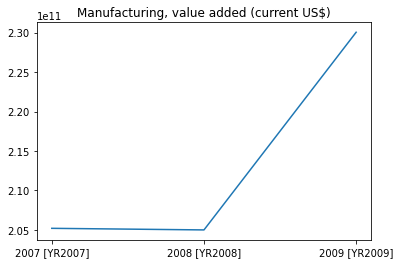

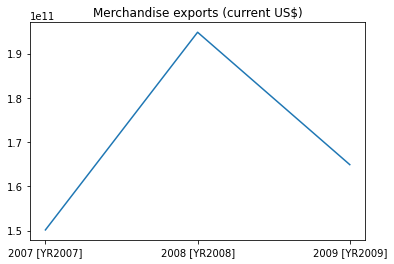

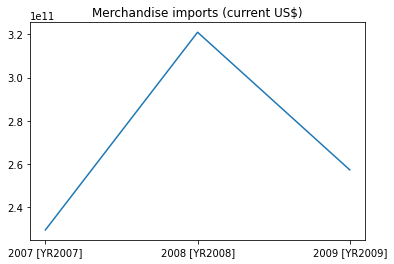

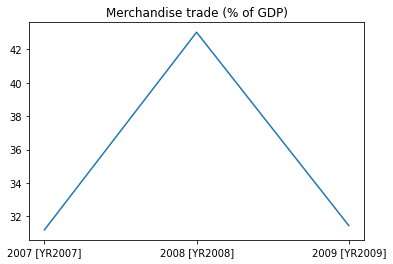

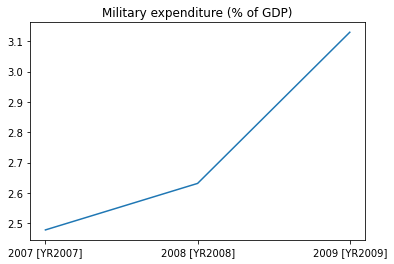

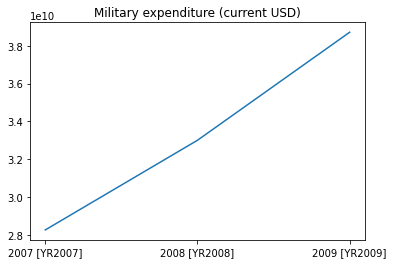

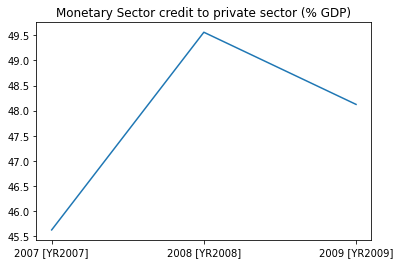

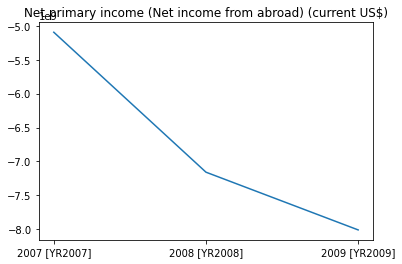

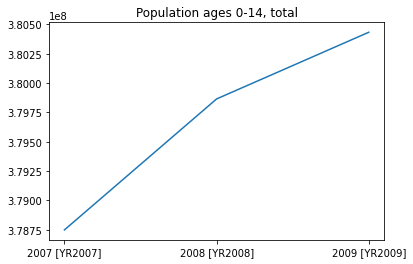

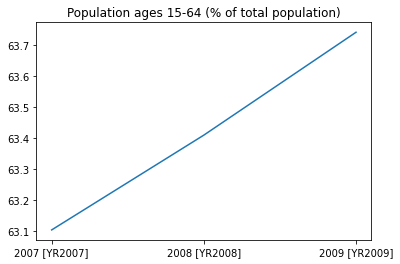

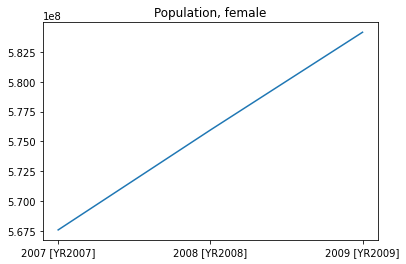

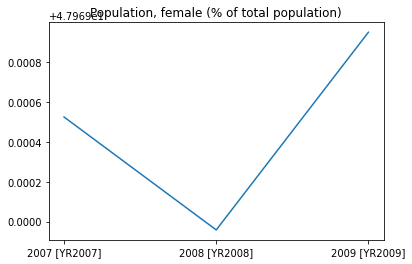

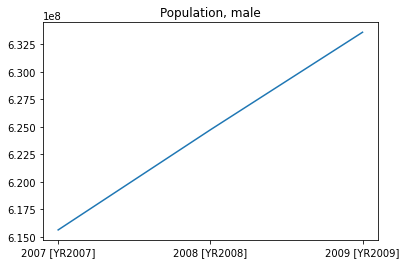

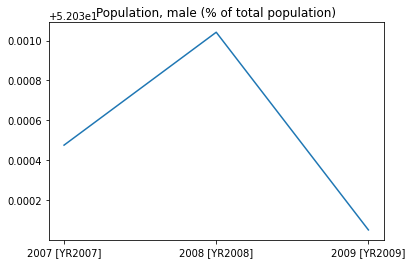

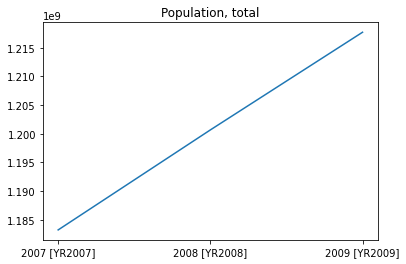

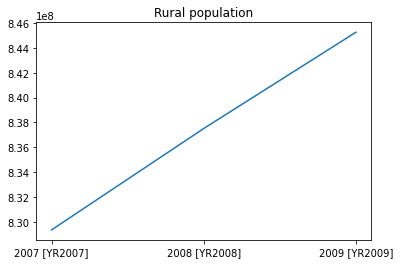

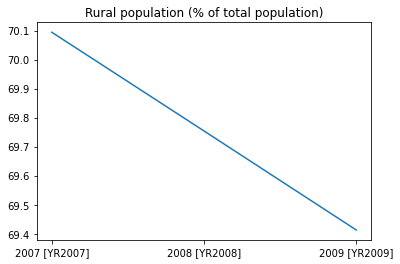

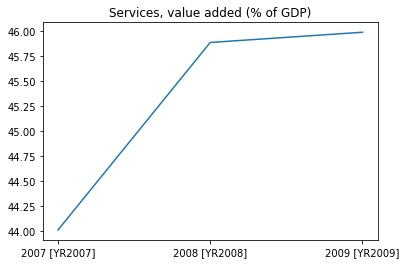

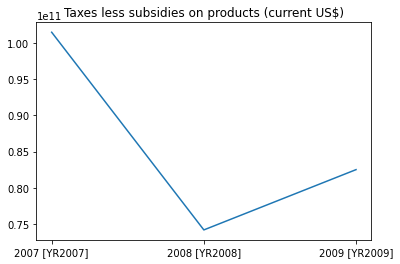

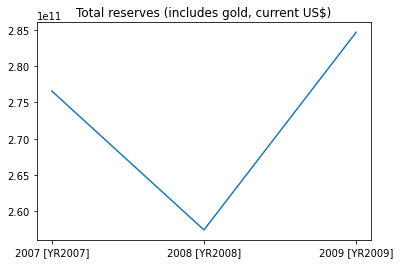

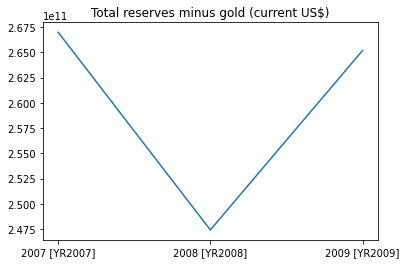

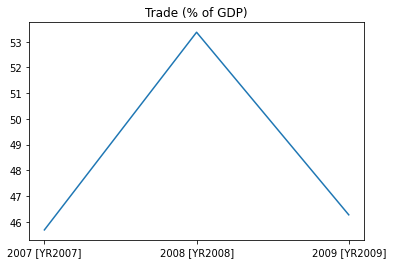

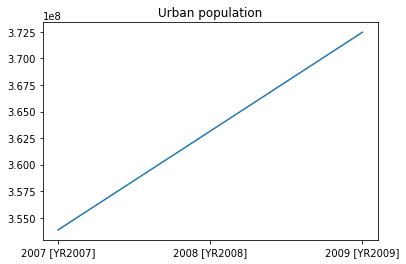

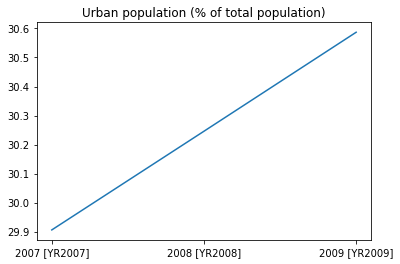

In [102]:
for i in new.columns[1:]:
    plt.title(i)
    x = new[new.columns[0]]
    y = new[i]
    plt.plot(x, y)
    plt.show()